<h1><center>New York - Citywide Mobility Survey Analysis</center></h1>

1. [Introduction](#intro)
2. [Data Wrangling Overview](#overview)
3. [Data Mapping](#map)
4. [Data Cleaning](#cleaning)
    - [Verification of primary keys](#verif)
    - [Recoding the values of dataset](#recode)
    - [Ranking sustainability of the transportation mode](#rank)
    - [Dataset creation with necessary columns](#dat)
5. [Data Merging](#merging)
    - [Renaming the column names](#rename)
    - [Merging main and trip data respective to each year](#trip)
    - [Checking the data consistency](#consistent)
    - [Aggregating the data to determine the average ranking](#agg)
    - [Merge the two years data into one final dataset](#merge)
    - [Handling outliers and nulls in the final dataset](#outliers)
6. [Data Visualization](#visual)
    - [Transportation Mode Preferences](#preferences)
    - [Transportation Mode Sustainability Rank](#sustainability)
7. [Conclusion](#conc)

# Introduction <a id="intro"></a>

NYC DOT conducts a robust annual travel survey called the Citywide Mobility Survey (CMS). Launched in 2017, it seeks to assess the travel behavior, preferences, and attitudes of New York City residents. Over 3,000 New Yorkers are surveyed each year, with approximately 300 respondents from each of the ten survey zones. The survey zones are made up of neighborhood tabulation areas (NTAs), which means that standard Census and American Community Survey (ACS) geographies can nest within the survey zones. The scope of our project is the survey conducted in the years 2017 and 2018 respectively.

### Objectives of Analysis
- Understand the factors and experiences that drive transportation choices for New York City residents.
- Assess the state of transportation within the City.
- Establish the change in transportation preferences between the years 2017 and 2018.

### Methodological Overview
The two chosen surveys for the years 2017 and 2018 are divided into two sections: the *main survey* and the *trip diary*. 

The main survey assessed behaviors, attitudes, and perceptions of transportation throughout New York City. The trip diary recorded each trip that respondents had taken the previous day. A trip was defined as any oneway journey that started in one location and ended in another. These two sections yielded separate data sets, which were first analyzed independently and combined at the later steps.


**Main Survey**

A total of 3,603 and 3,301 New York City residents aged 18 and over participated in the survey for the years 2017 and 2018 respectively. Half of the sample was recruited over the phone using random digit dialing (RDD) based on area code and a purchased sample list. The other half was recruited online via sample lists vetted by DOT’s consultant team and identified by zip code. Of the phone sample, 60% of interviews were completed via landline and 40% via cell phone.


**Trip Diary**

Each respondent was asked to give a detailed description of all trips taken the prior day. This included the following questions:
- Trip origin & destination
- Transportation modes taken
- Trip length
- Trip purpose
- How typical the trips that day were

**2017** : In total, trip details for 6,986 trips were captured: 3,252 trips captured over the phone, 3,734 online.

**2018** : In total, trip details for 7,977 trips were captured: 6,063 trips captured over the phone, 1,914 online.


### Sustainable Mode Share

New York City measures its progress toward efficient mobility goals by tracking the sustainable mode share of transportation: the percentage of New Yorkers walking, biking, and using transit to get around the City. By 2015, the city already had the highest proportion of trips made by sustainable mode of any large U.S. city: 67 percent of all trips. But to reach their congestion-mitigation, safety, health, and sustainability goals, the city plans to reach 80 percent sustainable mode share by 2050.

OneNYC 2050 reflects New York City’s commitment, in the “Roadmap to 80×50” to a safe, sustainable transportation future. The plan prioritizes walkability, safe streets, and improved public transit.

With New York City’s population projected to exceed 9 million by 2050, and with capacity already stretched thin on congested roads and subways, the officials aim to prioritize and invest in efficient and sustainable transportation modes: biking, walking, and mass transit. By doing so, they will be able to reduce greenhouse gas (GHG) emissions, support sustainable growth, and achieve the ambitious goal they set in 2015 to have 80 percent of all trips in the city taken by sustainable modes by 2050. The city will prioritize sustainable modes in the planning and design of the built environment, and help make them the default choice in New York City so no one needs to rely on a car.

# Data Wrangling Process Overview <a id="overview"></a>
<img src="images/mapping.png"/>

In [1]:
#import libraries
import pandas as pd
import numpy as np

np.random.seed(12345)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#loading all files
df_2018_main = pd.read_csv('data\Citywide_Mobility_Survey_-_Main_Survey_2018.csv', na_values=' ', low_memory=False)
df_2018_trip = pd.read_csv('data\Citywide_Mobility_Survey_-_Trip_Diary_2018.csv', na_values=' ', low_memory=False)

df_2017_main = pd.read_csv('data\Citywide_Mobility_Survey_-_Main_Survey_2017.csv', na_values=' ', low_memory=False)
df_2017_trip = pd.read_csv('data\Citywide_Mobility_Survey_-_Trip_Diary_2017.csv', na_values=' ', low_memory=False)

In [3]:
#checking data of the loaded files
#2018
print('In 2018 main survey, there are',df_2018_main.shape[0],'rows and',df_2018_main.shape[1],'columns')
print('In 2018 trip survey, there are',df_2018_trip.shape[0],'rows and',df_2018_trip.shape[1],'columns')

#2017
print('In 2017 main survey, there are',df_2017_main.shape[0],'rows and',df_2017_main.shape[1],'columns')
print('In 2017 trip survey, there are',df_2017_trip.shape[0],'rows and',df_2017_trip.shape[1],'columns')

In 2018 main survey, there are 3301 rows and 331 columns
In 2018 trip survey, there are 7977 rows and 118 columns
In 2017 main survey, there are 3603 rows and 454 columns
In 2017 trip survey, there are 6986 rows and 109 columns


In [4]:
#data overview
print('2018 data overview\n\n')
display(df_2018_main.head(3), df_2018_trip.head(3))

print('\n\n2017 data overview\n\n')
display(df_2017_main.head(3), df_2017_trip.head(3))

2018 data overview




,Job,DataCollection_StartTime,UniqueID,QDAY,qNTACODE,qGENDER,qAGE,qAGECODE,qRACE,qHISPANIC,qRACECODE,qEDUCATION,qINCOME,qSURVEYZONE,qZIPHOME,qBOROUGH,qLICENSE,qCARACCESS,qCARMANYNUM,gCARTYPE1_qCARTYPE1_mA,gCARTYPE1_qCARTYPE2_mA,gCARTYPE1_qCARTYPE3_mA,gCARTYPE1_qCARTYPE4_mA,qcarhybrid1,qcarhybrid2,qcarhybrid3,qcarhybrid4,qcarhybrid5,qcarhybrid6,qCARCHANGE,qCARREDUCEa1,qCARREDUCEa2,qCARREDUCEa3,qCARREDUCEa4,qCARREDUCEa5,qCARREDUCEa6,qCARREDUCEa7,qCARREDUCEa8,qCARREDUCEa9,qCARINCREASEa1,qCARINCREASEa2,qCARINCREASEa3,qCARINCREASEa4,qCARINCREASEa5,qCARINCREASEa6,qCARINCREASEa7,qCARINCREASEa8,qCARINCREASEa9,qELECTRICCONSIDER,qNOELECTRIC1,qNOELECTRIC2,qNOELECTRIC3,qNOELECTRIC4,qNOELECTRIC5,qNOELECTRIC6,qNOELECTRIC7,qNOELECTRIC8,gCARPARK1_qCARPARK1_mA,gCARPARK1_qCARPARK2_mA,gCARPARK1_qCARPARK3_mA,gCARPARK1_qCARPARK4_mA,qPAYTOPARK,qPAYTOPARK_AMOUNT,qshare1,qshare2,qshare3,qshare4,qshare5,qshare6,qshare7,qshare8,qSMARTPHONE,qTRIPPLANAPP,qRIDEHAIL1,qRIDEHAIL2,qRIDEHAIL3,qRIDEHAIL4,qRIDEHAIL5,qRIDEHAIL6,qRIDEHAIL7,qRIDEHAIL8,qRIDEHAIL_FREQ,qRIDEHAILPURPOSE,qBIKEOWN,qBIKEMANY,qBIKETYPE1,qBIKETYPE2,qBIKETYPE3,qBIKETYPE4,qBIKETYPE5,qBIKESTORE1,qBIKESTORE2,qBIKESTORE3,qBIKESTORE4,qBIKESTORE5,qBIKESTORE6,qBIKESTORE7,qBIKESTORE8,qBIKESTORE9,qBIKERIDE,qBIKETO,qBIKEDAYS,qBIKEWHY1,qBIKEWHY2,qBIKEWHY3,qBIKEWHY4,qBIKEWHY5,qBIKEWHY6,qBIKEWHY7,qBIKEWHY8,qBIKEWHYNOT1,qBIKEWHYNOT2,qBIKEWHYNOT3,qBIKEWHYNOT4,qBIKEWHYNOT5,qBIKEWHYNOT6,qBIKEWHYNOT7,qBIKEWHYNOT8,qBIKESTOLEN,qCITIBIKE,qCITIBIKEFREQ,gcitibk1_qCITIBIKEISSUES1_mA,gcitibk1_qCITIBIKEISSUES2_mA,qNOCITIBIKE01,qNOCITIBIKE02,qNOCITIBIKE03,qNOCITIBIKE04,qNOCITIBIKE05,qNOCITIBIKE06,qNOCITIBIKE07,qNOCITIBIKE08,qNOCITIBIKE09,qNOCITIBIKE10,qNOCITIBIKE11,gFREIGHT1b_qFREIGHT1_mA,gFREIGHT1b_qFREIGHT2_mA,gFREIGHT1b_qFREIGHT3_mA,gFREIGHT1b_qFREIGHT4_mA,qPACKAGEDELIVER,qPOSTALSTORE,qSUBWAYSERVICE,qSUBWAYIMPACT,qTRANSPORTNOSUBWAY01,qTRANSPORTNOSUBWAY02,qTRANSPORTNOSUBWAY03,qTRANSPORTNOSUBWAY04,qTRANSPORTNOSUBWAY05,qTRANSPORTNOSUBWAY06,qTRANSPORTNOSUBWAY07,qTRANSPORTNOSUBWAY08,qTRANSPORTNOSUBWAY09,qTRANSPORTNOSUBWAY10,qTRANSPORTNOSUBWAY11,qBUSSERVICE,qBUSIMPACT,qtransportnobus01,qtransportnobus02,qtransportnobus03,qtransportnobus04,qtransportnobus05,qtransportnobus06,qtransportnobus07,qtransportnobus08,qtransportnobus09,qtransportnobus10,qtransportnobus11,qAUTOVEHICLEFAM,qAUTOVEHICLEWILL,qAUTOVEHICLESAFE,qMARRIED,qWELFARE1,qWELFARE2,qWELFARE3,qWELFARE4,qWELFARE5,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qDISABILITY9,qBUILDINGb,qRENT,qCHILDREN,gCHILD1_qCHILD1_mA,gCHILD1_qCHILD2_mA,gCHILD1_qCHILD3_mA,gCHILD1_qCHILD4_mA,qCHILD1SCHOOLADDR,qCHILD2SCHOOLADDR,qCHILD3SCHOOLADDR,qCHILD4SCHOOLADDR,qACCOMPANY,qSCHOOLTRAVELCODE01,qSCHOOLTRAVELCODE02,qSCHOOLTRAVELCODE03,qSCHOOLTRAVELCODE04,qSCHOOLTRAVELCODE05,qSCHOOLTRAVELCODE06,qSCHOOLTRAVELCODE07,qSCHOOLTRAVELCODE08,qSCHOOLTRAVELCODE09,qSCHOOLTRAVELCODE10,qSCHOOLTRAVELCODE11,qSCHOOLTRAVELCODE12,qSCHOOLTRAVELCODE13,qSCHOOLTRAVELCODE14,qSCHOOLTRAVELCODE15,qSCHOOLTRAVELCODE16,qSCHOOLTRAVELCODE17,qSCHOOLTRAVELCODE18,qSCHOOLTRAVELCODE19,qSCHOOLTRAVELCODE20,qSCHOOLTRAVELCODE21,qSCHOOLTRAVELCODE22,qSCHOOLTRAVELCODE23,qSCHOOLTRAVELCODE24,qSCHOOLTRAVELCODE25,qSCHOOLTRAVELCODE26,qSCHOOLTRAVELCODE27,qSCHOOLTRANSITTO1,qSCHOOLTRANSITTO2,qSCHOOLTRANSITTO3,qSCHOOLTRANSITTO4,qSCHOOLTRANSITTO5,qSCHOOLTRANSITTO6,qSCHOOLTRANSITTO7,qSCHOOLTRANSITFROM1,qSCHOOLTRANSITFROM2,qSCHOOLTRANSITFROM3,qSCHOOLTRANSITFROM4,qSCHOOLTRANSITFROM5,qSCHOOLTRANSITFROM6,qSCHOOLTRANSITFROM7,qEMPLOYMENT,qEMPLOYMENTCODE,qINDUSTRY,gFULLTIME_qFULLTIME_mA,gFULLTIME_qPARTTIME_mA,qNUMBEROFJOBS,qWORKLOCATION,qWORKFH,qBOROUGH_WORK1,qNTACODE_WORK,qTIMEWORK,qTIMEHOME,qBOROUGH_WORK2,qNTACODE_WORK2,qTIMEWORK2,qTIMEHOME2,qBOROUGH_WORK3,qNTACODE_WORK3,qTIMEWORK3,qTIMEHOME3,qWORKTRAVELCODE01,qWORKTRAVELCODE02,qWORKTRAVELCODE03,qWORKTRAVELCODE04,qWORKTRAVELCODE05,qWORKTRAVELCODE06,qWORKTRAVELCODE07,qWORKTRAVELCODE08,qWORKTRAVELCODE09,qWORKTRAVELCODE10,qWORKTRAVELCODE11,qW

,Job,Trip_ID,UniqueID,QDAY,qday1typical,qBOROUGH_HOME,NTACODE_HOME,qSURVEYZONE_HOME,qTRIPDAYTIME,qDAY1TRIPSTARTCODE,qDAY1TRIPSTARTAM,qDAY1TRIPSTARTNOON,qDAY1TRIPSTARTPM,qDAY1TRIP_OUTSIDENYC_START,qBOROUGH_START,qNTACODE_START,SURVEYZONE_START,qDAY1TRIPEND,qDAY1TRIP_OUTSIDENYC_END,qBOROUGH_END,qNTACODE_END,SURVEYZONE_END,qDAY1TRIPENDCODE,qDAY1TRIPTRANSITTO1,qDAY1TRIPTRANSITTO2,qDAY1TRIPTRANSITTO3,qDAY1TRIPTRANSITTO4,qDAY1TRIPTRANSITTO5,qDAY1TRIPTRANSITTO6,qDAY1TRIPTRANSITTO7,qDAY1TRIPTRANSITFROM1,qDAY1TRIPTRANSITFROM2,qDAY1TRIPTRANSITFROM3,qDAY1TRIPTRANSITFROM4,qDAY1TRIPTRANSITFROM5,qDAY1TRIPTRANSITFROM6,qDAY1TRIPTRANSITFROM7,qDAY1TRIPTRAVELCODE01,qDAY1TRIPTRAVELCODE02,qDAY1TRIPTRAVELCODE03,qDAY1TRIPTRAVELCODE04,qDAY1TRIPTRAVELCODE05,qDAY1TRIPTRAVELCODE06,qDAY1TRIPTRAVELCODE07,qDAY1TRIPTRAVELCODE08,qDAY1TRIPTRAVELCODE09,qDAY1TRIPTRAVELCODE10,qDAY1TRIPTRAVELCODE11,qDAY1TRIPTRAVELCODE12,qDAY1TRIPTRAVELCODE13,qDAY1TRIPTRAVELCODE14,qDAY1TRIPTRAVELCODE15,qDAY1TRIPTRAVELCODE16,qDAY1TRIPTRAVELCODE17,qDAY1TRIPTRAVELCODE18,qDAY1TRIPTRAVELCODE19,qDAY1TRIPTRAVELCODE20,qDAY1TRIPTRAVELCODE21,qDAY1TRIPTRAVELCODE22,qDAY1TRIPTRAVELCODE23,qDAY1TRIPTRAVELCODE24,qDAY1TRIPTRAVELCODE25,qDAY1TRIPTRAVELCODE26,qDAY1TRIPTRAVELCODE27,qDAY1TRIPPURPOSE,qDAY1TRIPLENGTH,qDAY1TRIPLENGTH_FLT,qDAY1TRIPLENGTH_CAT,qDAY1TRIPPARK,qDAY1TRIPPARKPAY,qDAY1TRIPPARKPAY_AMOUNT,qDAY1TRIPBIKESTORE,Number_of_Trips_Taken,qGENDER,qINCOME,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qDISABILITY9,qAGE,qAGECODE,qRACE,qRACECODE,qHISPANIC,qEDUCATION,qLICENSE,qCARACCESS,qCARCHANGE,qWELFARE1,qWELFARE2,qWELFARE3,qWELFARE4,qWELFARE5,qSMARTPHONE,qshare1,qshare2,qshare3,qshare4,qshare5,qshare6,qshare7,qshare8,qTEMPHIGH,qTEMPLOW,qPRECIPITATION,qSUNRISE,qSUNSET,qCITIBIKE,qDAY1TRIPTRAVELCODE_SP,qModeGrouping,qSustainableMode,allwt,qPurposeRecode
0,Online,3100140,100140,Sunday,NaN,Manhattan,NaN,Manhattan Core,NOON,Work,NaN,Work,NaN,NaN,Manhattan,MN24,Manhattan Core,Home,NaN,Manhattan,MN13,Manhattan Core,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Commute to/from work,26,26.00000,26 to 30,NaN,NaN,NaN,On the street,3 trips,Male,"$100,000 - $149,999",No,No,No,No,No,No,Yes,No,No,51,45-54,White/Caucasian,"White, Non-Hispanic","No, not of Hispanic, Latino, or Spanish origin","Graduate degree (i.e., Master's, Professional,...",Yes,I personally own or lease a car,The number has not changed,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,77.00000,54.00000,0.00000,5.47000,19.58000,Yes,Citi Bike,Bike,Yes,0.36380,Commute to/from work
1,Online,3103836,103836,Monday,NaN,Staten Island,NaN,Staten Island,AM,Other,Other,NaN,NaN,NaN,Manhattan,MN25,Manhattan Core,Work,NaN,Manhattan,MN17,Manhattan Core,Work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Commute to/from work,35,35.00000,31 to 35,NaN,NaN,NaN,Other,5 trips,Female,"$35,000 - $49,999",No,No,No,No,No,No,Yes,No,No,25,25-34,White/Caucasian,"White, Non-Hispanic","No, not of Hispanic, Latino, or Spanish origin","Bachelor's degree (i.e., BA, BS, AB)",Yes,I do not have access to a car,The number has not changed,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,No,Personal bicycle,Bike,Yes,0.08275,Commute to/from work
2,Online,4100749,100749,Wednesday,NaN,Brooklyn,NaN,Inner Brooklyn,PM,Home,NaN,NaN,Home,NaN,Brooklyn,BK64,Inner Brooklyn,Other,NaN,Brooklyn,BK37,Inner Brooklyn,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Other,10,10.00000,6 to 10,NaN,NaN,NaN,On the street,5 trips,Female,"$100,000 - $149,999",No,No,No,No,No,No,Yes,No,No,40,35-44,Black/ African American/ Caribbean American,"Black, Non-Hispanic","No, not of Hispanic, Latino, or Spanish origin","Bachelor's degree (i.e., BA, BS, AB)",Yes,I perso



2017 data overview




,Job,UniqueID,Respondent_Serial,StartTime_EST,FinishTime_EST,cfmc_case_id,qLANGUAGEPREF,qgender,qage,qrace,qRACE_other6,qhispanic,qHISPANIC_other5,qeducation,qincome,qzipcmb,qSurveyZone,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qUSETRAVELCODE01,qUSETRAVELCODE02,qUSETRAVELCODE03,qUSETRAVELCODE04,qUSETRAVELCODE05,qUSETRAVELCODE06,qUSETRAVELCODE07,qUSETRAVELCODE08,qUSETRAVELCODE09,qUSETRAVELCODE10,qUSETRAVELCODE11,qUSETRAVELCODE12,qUSETRAVELCODE13,qUSETRAVELCODE14,qUSETRAVELCODE15,qUSETRAVELCODE16,qUSETRAVELCODE17,qUSETRAVELCODE18,qUSETRAVELCODE19,qUSETRAVELCODE20,qUSETRAVELCODE21,qUSETRAVELCODE22,qUSETRAVELCODE23,qUSETRAVELCODE24,qUSETRAVELCODE25,qUSETRAVELCODE26,qlicense,qcaraccess,qCARACCESS_other4,qcarmany,qcarchange,gCARREDUCE1_qCARREDUCE1_mA,gCARREDUCE1_qCARREDUCE2_mA,gCARREDUCE1_qCARREDUCE3_mA,gCARREDUCE1_qCARREDUCE4_mA,gCARREDUCE1_qCARREDUCE5_mA,gCARREDUCE1_qCARREDUCE6_mA,gCARINCREASE1_qCARINCREASE1_mA,gCARINCREASE1_qCARINCREASE2_mA,gCARINCREASE1_qCARINCREASE3_mA,gCARINCREASE1_qCARINCREASE4_mA,gCARINCREASE1_qCARINCREASE5_mA,gCARINCREASE1_qCARINCREASE6_mA,qCARPARK1,qCARPARK2,qCARPARK3,qCARPARK4,qCARPARK5,qCARPARK6,qCARPARK7,qCARPARK8,qCARPARK_other6,qcarparkpay,qcarparkpay_month,qcarmiles,qSHARE1,qSHARE2,qSHARE3,qSHARE4,qSHARE5,qSHARE6,qSHARE7,qSHARE8,qSHARE_other5,qsharemember,qsharefreq,qSHAREPURPOSE01,qSHAREPURPOSE02,qSHAREPURPOSE03,qSHAREPURPOSE04,qSHAREPURPOSE05,qSHAREPURPOSE06,qSHAREPURPOSE07,qSHAREPURPOSE08,qSHAREPURPOSE09,qSHAREPURPOSE10,qSHAREPURPOSE11,qSHAREPURPOSE_other9,qZIPTRAVEL1,qZIPTRAVEL2,qZIPTRAVEL3,qZIPTRAVEL4,qZIPTRAVEL5,qZIPTRAVEL6,qZIPTRAVEL7,qZIPTRAVEL8,qZIPTRAVEL9,qZIPTRAVEL_other7,qREACHTRAVEL1,qREACHTRAVEL2,qREACHTRAVEL3,qREACHTRAVEL4,qREACHTRAVEL5,qREACHTRAVEL6,qREACHTRAVEL7,qREACHTRAVEL8,qREACHTRAVEL9,qREACHTRAVEL_other7,qSHARETRAVELCODE01,qSHARETRAVELCODE02,qSHARETRAVELCODE03,qSHARETRAVELCODE04,qSHARETRAVELCODE05,qSHARETRAVELCODE06,qSHARETRAVELCODE07,qSHARETRAVELCODE08,qSHARETRAVELCODE09,qSHARETRAVELCODE10,qSHARETRAVELCODE11,qSHARETRAVELCODE12,qSHARETRAVELCODE13,qSHARETRAVELCODE14,qSHARETRAVELCODE15,qSHARETRAVELCODE16,qSHARETRAVELCODE17,qSHARETRAVELCODE18,qSHARETRAVELCODE19,qSHARETRAVELCODE20,qSHARETRAVELCODE21,qSHARETRAVELCODE22,qSHARETRAVELCODE23,qSHARETRAVELCODE24,qSHARETRAVELCODE25,qSHARETRAVELCODE26,qRIDEHAIL1,qRIDEHAIL2,qRIDEHAIL3,qRIDEHAIL4,qRIDEHAIL5,qRIDEHAIL6,qRIDEHAIL7,qRIDEHAIL8,qridehail_freq,qRIDEHAILPURPOSE01,qRIDEHAILPURPOSE02,qRIDEHAILPURPOSE03,qRIDEHAILPURPOSE04,qRIDEHAILPURPOSE05,qRIDEHAILPURPOSE06,qRIDEHAILPURPOSE07,qRIDEHAILPURPOSE08,qRIDEHAILPURPOSE09,qRIDEHAILPURPOSE10,qRIDEHAILPURPOSE11,qRIDEHAILPURPOSE_other9,qPRERIDEHAILCODE01,qPRERIDEHAILCODE02,qPRERIDEHAILCODE03,qPRERIDEHAILCODE04,qPRERIDEHAILCODE05,qPRERIDEHAILCODE06,qPRERIDEHAILCODE07,qPRERIDEHAILCODE08,qPRERIDEHAILCODE09,qPRERIDEHAILCODE10,qPRERIDEHAILCODE11,qPRERIDEHAILCODE12,qPRERIDEHAILCODE13,qPRERIDEHAILCODE14,qPRERIDEHAILCODE15,qPRERIDEHAILCODE16,qPRERIDEHAILCODE17,qPRERIDEHAILCODE18,qPRERIDEHAILCODE19,qPRERIDEHAILCODE20,qPRERIDEHAILCODE21,qPRERIDEHAILCODE22,qPRERIDEHAILCODE23,qPRERIDEHAILCODE24,qTRIPPLANNING1,qTRIPPLANNING2,qTRIPPLANNING3,qTRIPPLANNING4,qTRIPPLANNING5,qTRIPPLANNING6,qTRIPPLANNING7,qTRIPPLANNING_other4,qbikeown,qbikemany,qBIKETYPE1,qBIKETYPE2,qBIKETYPE3,qBIKETYPE4,qBIKETYPE5,qBIKETYPE_other3,qBIKESTORE1,qBIKESTORE2,qBIKESTORE3,qBIKESTORE4,qBIKESTORE5,qBIKESTORE6,qBIKESTORE7,qBIKESTORE8,qBIKESTORE9,qBIKESTORE_other7,qbikeride,qbiketo,qbikedays,qcitibike,qcitibikefreq,qNOCITIBIKE1,qNOCITIBIKE2,qNOCITIBIKE3,qNOCITIBIKE4,qNOCITIBIKE5,qNOCITIBIKE6,qNOCITIBIKE7,qNOCITIBIKE8,qNOCITIBIKE9,qNOCITIBIKE_other7,qBENEFITS01,qBENEFITS02,qBENEFITS03,qBENEFITS04,qBENEFITS05,qBENEFITS06,qBENEFITS07,qBENEFITS08,qBENEFITS09,qBENEFITS10,qBENEFITS11,qBENEFITS12,qBENEFITS13,qBENEFITS14,qBENEFITS_other11,gFREIGHT1_qFREIGHT1_mA,gFREIGHT1_qFREIGHT2_mA,gFREIGHT1_qFREIGHT3_mA,gFREIGHT1_qFREIGHT4_mA,gFREIGHTnew,qsafety1,qsafety2,qsafety3,qsafety4,qsafety5,qsafety6,gFOCUSAA1_qFOCUSAA1_mA1,gFOCUSAA1_qFOCUSAA1_mA2,

,Job,Respondent_Serial,cfmc_case_id,UniqueID,qday1typical,qday1triptravelcode01,qday1triptravelcode02,qday1triptravelcode03,qday1triptravelcode04,qday1triptravelcode05,qday1triptravelcode06,qday1triptravelcode07,qday1triptravelcode08,qday1triptravelcode09,qday1triptravelcode10,qday1triptravelcode11,qday1triptravelcode12,qday1triptravelcode13,qday1triptravelcode14,qday1triptravelcode15,qday1triptravelcode16,qday1triptravelcode17,qday1triptravelcode18,qday1triptravelcode19,qday1triptravelcode20,qday1triptravelcode21,qday1triptravelcode22,qday1triptravelcode23,qday1triptravelcode24,qday1triptravelcode25,qday1triptravelcode26,qday1trippurpose,qday1tripdestination,qday1triplength,qDAY1TRIP1TRANSITTO1,qDAY1TRIP1TRANSITTO2,qDAY1TRIP1TRANSITTO3,qDAY1TRIP1TRANSITTO4,qDAY1TRIP1TRANSITTO5,qDAY1TRIP1TRANSITTO6,qDAY1TRIP1TRANSITTO7,qDAY1TRIP1TRANSITFROM1,qDAY1TRIP1TRANSITFROM2,qDAY1TRIP1TRANSITFROM3,qDAY1TRIP1TRANSITFROM4,qDAY1TRIP1TRANSITFROM5,qDAY1TRIP1TRANSITFROM6,qDAY1TRIP1TRANSITFROM7,qday,qgender,qage,qrace,qhispanic,qeducation,qincome,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qcaraccess,qcarchange,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qsmartphone,qSurveyZone,Qagecode_final1,Qagecode_final2,Qagecode_final3,Qagecode_final4,Qagecode_final5,Qagecode_final6,Qagecode_final7,qcitibike,Filt_Number_of_Trips,qWPSurveyZone01,qWPSurveyZone02,qWPSurveyZone03,qWPSurveyZone04,qWPSurveyZone05,qWPSurveyZone06,qWPSurveyZone07,qWPSurveyZone08,qWPSurveyZone09,qWPSurveyZone10,qday1trip1start,qday1trip1_outsidenyc_start,qday1trip1startcode,qday1trip1end,qday1trip1_outsidenyc_end,DAY1TRIPNTANAMECMB,qday1trip1park,qday1trip1parkpay,qday1trip1parkpay_amount,qday1trip1bikestore,qday1triptravelcode_sp,qModeGrouping,qSustainableMode,allwt,BOROUGHWt,racewt,eduwt,agegenwt
0,1,NaN,10000009.00000,120000009,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,NaN,30,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7,2,45,7,5,2,3,0,0,0,0,1,3,NaN,0,0,0,0,0,1,0,0,1,9,0,0,0,1,0,0,0,2,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.00000,1,NaN,NaN,NaN,NaN,0.00000,NaN,2,5,1,0.94997,5,6,1,5
1,1,NaN,10000010.00000,120000010,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3.00000,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,50,1,1,7,6,1,0,0,0,0,1,3.00000,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,2,2.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,NaN,1.00000,6,NaN,NaN,1.00000,2.00000,0.00000,NaN,11,6,2,0.53498,1,1,2,5
2,1,NaN,10000012.00000,120000012,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1.00000,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,80,3,1,7,9,0,1,0,0,0,3,NaN,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,1,0,2,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.00000,13,NaN,NaN,NaN,NaN,0.00000,NaN,1,8,1,1.94269,2,3,2,3


# Data Mapping <a id="map"></a>
Our strategy on determining the behavior of NYC respondents is to have a final dataset that contains both of the years survey result. 
<img src="images/merging strat.png" width=500 height=500/>

To compare the trend of behavior transportation of NYC residents, we will need to merge the two years data. Therefore, we have to check the columns matching between the years. Data Dictionary is provided by NYC gov website which specify the descriptions of the columns. However, due to number of columns, we need an automatic way to check which columns are matching or not.

In [5]:
#function for checking
def comp_tab(tab1,tab2):
    chk_exist=[]
    for i in tab1:
        if(i in tab2):
            chk_exist.append(True)
        else:
            chk_exist.append(False)
    
    verif = pd.DataFrame(data=zip(tab1,chk_exist), columns=['column','chk_exist'])
    match_cols = verif[verif.chk_exist==True]
    
    return(match_cols)

In [6]:
#Matching columns of main survey of 2018 and 2017
tb1_col = [i.lower() for i in df_2018_main.columns]
tb2_col = [i.lower() for i in df_2017_main.columns]
cmp_tab = comp_tab(tb1_col, tb2_col)
print('There are {} matching columns'.format(cmp_tab.shape[0]))
print('The matching columns are:',list(cmp_tab['column']))

There are 120 matching columns
The matching columns are: ['job', 'uniqueid', 'qgender', 'qage', 'qrace', 'qhispanic', 'qeducation', 'qincome', 'qsurveyzone', 'qlicense', 'qcaraccess', 'qcarchange', 'qshare1', 'qshare2', 'qshare3', 'qshare4', 'qshare5', 'qshare6', 'qshare7', 'qshare8', 'qsmartphone', 'qridehail1', 'qridehail2', 'qridehail3', 'qridehail4', 'qridehail5', 'qridehail6', 'qridehail7', 'qridehail8', 'qridehail_freq', 'qbikeown', 'qbikemany', 'qbiketype1', 'qbiketype2', 'qbiketype3', 'qbiketype4', 'qbiketype5', 'qbikestore1', 'qbikestore2', 'qbikestore3', 'qbikestore4', 'qbikestore5', 'qbikestore6', 'qbikestore7', 'qbikestore8', 'qbikestore9', 'qbikeride', 'qbiketo', 'qbikedays', 'qcitibike', 'qcitibikefreq', 'qmarried', 'qwelfare1', 'qwelfare2', 'qwelfare3', 'qwelfare4', 'qwelfare5', 'qdisability1', 'qdisability2', 'qdisability3', 'qdisability4', 'qdisability5', 'qdisability6', 'qdisability7', 'qdisability8', 'qrent', 'qchildren', 'qschooltravelcode01', 'qschooltravelcode02',

In [7]:
#Matching columns of trip survey of 2018 and 2017
tb1_col = [i.lower() for i in df_2018_trip.columns]
tb2_col = [i.lower() for i in df_2017_trip.columns]
cmp_tab = comp_tab(tb1_col, tb2_col)
print('There are {} matching columns'.format(cmp_tab.shape[0]))
print('The matching columns are:',list(cmp_tab['column']))

There are 54 matching columns
The matching columns are: ['job', 'uniqueid', 'qday', 'qday1typical', 'qday1triptravelcode01', 'qday1triptravelcode02', 'qday1triptravelcode03', 'qday1triptravelcode04', 'qday1triptravelcode05', 'qday1triptravelcode06', 'qday1triptravelcode07', 'qday1triptravelcode08', 'qday1triptravelcode09', 'qday1triptravelcode10', 'qday1triptravelcode11', 'qday1triptravelcode12', 'qday1triptravelcode13', 'qday1triptravelcode14', 'qday1triptravelcode15', 'qday1triptravelcode16', 'qday1triptravelcode17', 'qday1triptravelcode18', 'qday1triptravelcode19', 'qday1triptravelcode20', 'qday1triptravelcode21', 'qday1triptravelcode22', 'qday1triptravelcode23', 'qday1triptravelcode24', 'qday1triptravelcode25', 'qday1triptravelcode26', 'qday1trippurpose', 'qday1triplength', 'qgender', 'qincome', 'qdisability1', 'qdisability2', 'qdisability3', 'qdisability4', 'qdisability5', 'qdisability6', 'qdisability7', 'qdisability8', 'qage', 'qrace', 'qhispanic', 'qeducation', 'qcaraccess', 'qc

There are more than 50 columns matching for both main and trip survey. We will need to select the columns that we are only interested to check the sustainability of transportation of NYC residents. With the help of the automatic column matching and cross checking with the open data dictionary provided by NYC gov, we have arrived on selected columns to determine the behavior of NYC residents to determine factors that impact the choice of sustainable transportation.
- Does each NYC borough have different prefrerences on transportation mode? 
- Does person's demographic of gender, age, disability, family size, house rent, industry, income, and employment impacts with choice of transportation mode?
- Does  choice of transportation mode depends on the trip length and day of the week? 

In [8]:
#creating 2018 main and trip survey selected columns
df_2018_m = df_2018_main.loc[:, ['UniqueID','QDAY','qGENDER','qAGE','qBOROUGH','qRENT','qCHILDREN','qINCOME'
                                 ,'qDISABILITY1','qDISABILITY2','qDISABILITY3','qDISABILITY4','qDISABILITY5','qDISABILITY6','qDISABILITY7','qDISABILITY8','qDISABILITY9'
                                 ,'qINDUSTRY', 'qEMPLOYMENT','qEMPLOYMENTCODE', 'DataCollection_StartTime']]
df_2018_t = df_2018_trip.loc[:, ['Trip_ID','UniqueID','QDAY','qday1typical'
                                 ,'qBOROUGH_HOME','qDAY1TRIPLENGTH','Number_of_Trips_Taken'
                                 ,'qModeGrouping','qSustainableMode','qDAY1TRIPPURPOSE','qPurposeRecode']]

display(df_2018_m.head(5) , df_2018_t.head(5))

,UniqueID,QDAY,qGENDER,qAGE,qBOROUGH,qRENT,qCHILDREN,qINCOME,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qDISABILITY9,qINDUSTRY,qEMPLOYMENT,qEMPLOYMENTCODE,DataCollection_StartTime
0,100938,Friday,Female,38,Queens,Own,None,"$150,000-$199,999",No,No,No,No,No,No,Yes,No,No,Non-profit,Employed full time (working more than 30 hours...,Employed,13746130937.00000
1,105388,Sunday,Male,55,Brooklyn,Own,None,"$100,000 - $149,999",No,No,No,No,No,No,Yes,No,No,NaN,Unemployed,Unemployed,13749321989.00000
2,105415,Sunday,Male,65,Manhattan,Rent,None,"$25,000 - $34,999",No,No,No,No,No,No,Yes,No,No,NaN,Retired,Not in Labor Force,13749324591.00000
3,100402,Friday,Male,68,Brooklyn,Own,None,"$15,000 - $24,999",No,No,No,No,No,No,Yes,No,No,NaN,Retired,Not in Labor Force,13745513760.00000
4,100222,Monday,Male,50,Brooklyn,Own,None,"$200,000 and above",No,No,No,No,No,No,Yes,No,No,Education,Employed full time (working more than 30 hours...,Employed,13745174106.00000


,Trip_ID,UniqueID,QDAY,qday1typical,qBOROUGH_HOME,qDAY1TRIPLENGTH,Number_of_Trips_Taken,qModeGrouping,qSustainableMode,qDAY1TRIPPURPOSE,qPurposeRecode
0,3100140,100140,Sunday,NaN,Manhattan,26,3 trips,Bike,Yes,Commute to/from work,Commute to/from work
1,3103836,103836,Monday,NaN,Staten Island,35,5 trips,Bike,Yes,Commute to/from work,Commute to/from work
2,4100749,100749,Wednesday,NaN,Brooklyn,10,5 trips,Bike,Yes,Other,Other
3,1102293,102293,Tuesday,NaN,The Bronx,90,3 trips,Subway,Yes,Commute to/from work,Commute to/from work
4,52200588,50200588,Thursday,Very typical,Brooklyn,45,2 trips,Subway,Yes,Other,School


In [9]:
#creating 2017 main and trip survey selected columns
df_2017_m = df_2017_main.loc[:, ['Respondent_Serial','cfmc_case_id','UniqueID','qday1','qgender','qage','qBorough1','qBorough2','qBorough3','qBorough4','qBorough5'
                                 ,'qrent','qchildren','qincome'
                                 ,'qDISABILITY1','qDISABILITY2','qDISABILITY3','qDISABILITY4','qDISABILITY5','qDISABILITY6','qDISABILITY7','qDISABILITY8'
                                 ,'qindustry', 'qemployment','StartTime_EST']]
df_2017_t = df_2017_trip.loc[:, ['Respondent_Serial','cfmc_case_id','UniqueID','qday','qday1typical'
                                 ,'qBorough1','qBorough2','qBorough3','qBorough4','qBorough5'
                                 ,'qday1triplength','Filt_Number_of_Trips'
                                 ,'qModeGrouping','qSustainableMode','qday1trippurpose']]

display(df_2017_m.head(5) , df_2017_t.head(5))

,Respondent_Serial,cfmc_case_id,UniqueID,qday1,qgender,qage,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qrent,qchildren,qincome,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qindustry,qemployment,StartTime_EST
0,NaN,10000001.00000,110000001.00000,7.00000,2.00000,68.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2.00000,1.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,NaN,8.00000,05/13/2017
1,NaN,10000002.00000,110000002.00000,3.00000,2.00000,999.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2.00000,1.00000,4.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,8.00000,05/13/2017
2,NaN,10000008.00000,110000008.00000,4.00000,2.00000,41.00000,0.00000,0.00000,1.00000,0.00000,0.00000,2.00000,2.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,8.00000,2.00000,05/13/2017
3,NaN,10000009.00000,110000009.00000,3.00000,2.00000,45.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,4.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,NaN,11.00000,05/13/2017
4,NaN,10000010.00000,110000010.00000,7.00000,2.00000,50.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,14.00000,1.00000,05/13/2017


,Respondent_Serial,cfmc_case_id,UniqueID,qday,qday1typical,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qday1triplength,Filt_Number_of_Trips,qModeGrouping,qSustainableMode,qday1trippurpose
0,NaN,10000009.00000,120000009,7,2,0,0,0,0,1,30,4.00000,5,1,2
1,NaN,10000010.00000,120000010,7,3,1,0,0,0,0,30,2.00000,6,2,5
2,NaN,10000012.00000,120000012,7,3,0,1,0,0,0,15,3.00000,8,1,6
3,NaN,10000013.00000,120000013,7,2,1,0,0,0,0,120,5.00000,8,1,2
4,NaN,10000033.00000,120000033,3,2,0,1,0,0,0,15,2.00000,8,1,5


### Main Survey Mapping

<table cellspacing="0" border="0">
	<colgroup width="165"></colgroup>
	<colgroup width="217"></colgroup>
	<colgroup width="95"></colgroup>
	<colgroup width="251"></colgroup>
	<colgroup width="344"></colgroup>
	<colgroup width="64"></colgroup>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top bgcolor="#00B050"><b><font color="#FFFFFF">2018 main</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC000"><b><font color="#FFFFFF">2017 main</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Match</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Remarks</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Cleaning Required before merging two years</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Coded</font></b></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Respondent_Serial / cfmc_case_id</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Primary key of 2017 to join to 2017 trip</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Merge the two columns to act as primary key </font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">UniqueID</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">UniqueID</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=bottom bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="115" align="left" valign=top><font color="#000000">QDAY</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qday1</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description<br><br>* Null values equivalent to online respodents. Take the qday only in trip Survey</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qGENDER</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qgender</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">qAGE</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qage</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=bottom><font color="#000000"><br></font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qBOROUGH</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qBorough1, qBorough2, qBorough3, qBorough4, qBorough5</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 separated in five columns, while, 2018 has one column </font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 columns to be merge in one column</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qRENT</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qrent</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qCHILDREN</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qchildren</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qINCOME</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qincome</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qINDUSTRY</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qindustry</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qEMPLOYMENT</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qemployment</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY1</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY1</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY2</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY2</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY3</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY3</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY4</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY4</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY5</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY5</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">qDISABILITY6</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY7</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY6</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY8</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY7</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qDISABILITY9</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY8</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">qEMPLOYMENTCODE</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">DataCollection_StartTime</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">StartTime_EST</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 is datetime, while, 2018 is unix timestamp</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2018 to be code into date time</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
</table>

### Trip Survey Mapping

<table cellspacing="0" border="0">
	<colgroup width="159"></colgroup>
	<colgroup width="371"></colgroup>
	<colgroup width="88"></colgroup>
	<colgroup width="216"></colgroup>
	<colgroup width="277"></colgroup>
	<colgroup width="67"></colgroup>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top bgcolor="#00B050"><b><font color="#FFFFFF">2018 Trip</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC000"><b><font color="#FFFFFF">2017 Trip</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Match</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Remarks</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Cleaning Required before merging two years</font></b></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#A6A6A6"><b><font color="#FFFFFF">Coded</font></b></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">Trip_ID</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Respondent_Serial</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Merge the two columns to act as primary key </font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">cfmc_case_id</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Merge the two columns to act as primary key </font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">UniqueID</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">UniqueID</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">QDAY</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qday</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qday1typical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qday1typical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">qBOROUGH_HOME</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qBorough1, qBorough2, qBorough3, qBorough4, qBorough5</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 separated in five columns, while, 2018 has one column </font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 columns to be merge in one column</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">qDAY1TRIPLENGTH</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qday1triplength</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="38" align="left" valign=top><font color="#000000">Number_of_Trips_Taken</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">Filt_Number_of_Trips</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 is numerical values, 2018 has word 'trips' in its values</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2018 to be coded into numerical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY1</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY1</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY2</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY2</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY3</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY3</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY4</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY4</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY5</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY5</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">qDISABILITY6</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY7</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY6</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY8</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY7</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDISABILITY9</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qDISABILITY8</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qModeGrouping</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qModeGrouping</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qSustainableMode</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qSustainableMode</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="58" align="left" valign=top><font color="#000000">qDAY1TRIPPURPOSE</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">qday1trippurpose</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFEB9C"><font color="#9C5700">Partial Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 has coded numeric values, while, 2018 has categorical description</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000">2017 to be coded into categorical</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#C6EFCE"><font color="#006100">Yes</font></td>
	</tr>
	<tr>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" height="19" align="left" valign=top><font color="#000000">qPurposeRecode</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">No Match</font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top><font color="#000000"><br></font></td>
		<td style="border-top: 1px solid #000000; border-bottom: 1px solid #000000; border-left: 1px solid #000000; border-right: 1px solid #000000" align="left" valign=top bgcolor="#FFC7CE"><font color="#9C0006">NA</font></td>
	</tr>
</table>

# Data Cleaning <a id="cleaning"></a>
To clean the main and trip datasets of each year, we performed the following processes:
- Verification of primary keys between main and trip data of each year
- Recoding the values of dataset to ensure value consistency
- Created a column that ranks how sustainable the mode of transportation taken by respondent
- Created a dataset with the necessary columns

#### Checking of primary key of main and trip survey for each year <a id="verif"></a>
- We will need to merge the main and trip survey of each respective years. Therefore, we need to verify which primary key we can use for the two tables. The function below will do the checking of the primary keys. 

In [10]:
def uniq_key(main_tab, trip_tab):
    key_name = main_tab.name
    print('Verifying number of respondents-------------')
    print("Number of",key_name,"in main survey:",main_tab.count())
    print("Number of",key_name,"in trip survey:",trip_tab.count())
    
    print('\n\nVerifying all trip respondents exist between trip and main-------------')
    chk = main_tab.isin(trip_tab)
    trip_exist = main_tab[chk]
    print("Number of", key_name,"in main survey existing in trip survey:", trip_exist.count())
    
    chk2 = trip_tab.isin(main_tab)
    main_exist = trip_tab[chk2]
    print("Number of", key_name,"in trip survey existing in main survey:", main_exist.count()) 
    
    chk3 = ~main_tab.isin(trip_tab)
    trip_exist = main_tab[chk3]
    print("Number of", key_name,"in main survey that DO NOT EXIST in trip survey:", trip_exist.count()) 
    
    chk4 = ~trip_tab.isin(main_tab)
    main_exist = trip_tab[chk4]
    print("Number of", key_name,"in trip survey that DO NOT EXIST in main survey:", main_exist.count()) 

<b> Verification of 2018 dataset</b>. According to NYC mobility data dictionary for 2018, Unique ID is the unique respondent ID. We need to verify if this is correct in our dataset.

In [11]:
#verification for 2018 unique ID
main_tab=df_2018_m['UniqueID']
trip_tab=df_2018_t['UniqueID']
uniq_key(main_tab,trip_tab)

Verifying number of respondents-------------
Number of UniqueID in main survey: 3301
Number of UniqueID in trip survey: 7977


Verifying all trip respondents exist between trip and main-------------
Number of UniqueID in main survey existing in trip survey: 2810
Number of UniqueID in trip survey existing in main survey: 7977
Number of UniqueID in main survey that DO NOT EXIST in trip survey: 491
Number of UniqueID in trip survey that DO NOT EXIST in main survey: 0


<b>Results of verification:</b> It shows that all unique ID in trip has a corresponding ID in main, therefore unique ID is a correct primary key to join main and trip survey for 2017. However, we can see that there are some respondents in main survey but are not registed in trip survey. This means that the respondent that was chosen did not took a specific trip on that day.

<b> Verification of 2017 dataset</b>. According to NYC mobility data dictionary for 2017, there are 3 identifiers of the respondent namely UniqueID, Respondent_Serial, and cfmc_case_id. We need to verify which primary key is correct.

In [12]:
#verification for 2017 unique ID
main_tab=df_2017_m['UniqueID']
trip_tab=df_2017_t['UniqueID']
uniq_key(main_tab,trip_tab)

Verifying number of respondents-------------
Number of UniqueID in main survey: 3602
Number of UniqueID in trip survey: 6986


Verifying all trip respondents exist between trip and main-------------
Number of UniqueID in main survey existing in trip survey: 0
Number of UniqueID in trip survey existing in main survey: 0
Number of UniqueID in main survey that DO NOT EXIST in trip survey: 3602
Number of UniqueID in trip survey that DO NOT EXIST in main survey: 6986


In [13]:
#verification for 2017 Respondent_Serial ID
main_tab=df_2017_m['Respondent_Serial']
trip_tab=df_2017_t['Respondent_Serial']
uniq_key(main_tab,trip_tab)

Verifying number of respondents-------------
Number of Respondent_Serial in main survey: 1801
Number of Respondent_Serial in trip survey: 3734


Verifying all trip respondents exist between trip and main-------------
Number of Respondent_Serial in main survey existing in trip survey: 1532
Number of Respondent_Serial in trip survey existing in main survey: 3731
Number of Respondent_Serial in main survey that DO NOT EXIST in trip survey: 269
Number of Respondent_Serial in trip survey that DO NOT EXIST in main survey: 3


In [14]:
#verification for 2017 cfmc_case_id
main_tab=df_2017_m['cfmc_case_id']
trip_tab=df_2017_t['cfmc_case_id']
uniq_key(main_tab,trip_tab)

Verifying number of respondents-------------
Number of cfmc_case_id in main survey: 1801
Number of cfmc_case_id in trip survey: 3252


Verifying all trip respondents exist between trip and main-------------
Number of cfmc_case_id in main survey existing in trip survey: 1326
Number of cfmc_case_id in trip survey existing in main survey: 3252
Number of cfmc_case_id in main survey that DO NOT EXIST in trip survey: 475
Number of cfmc_case_id in trip survey that DO NOT EXIST in main survey: 0


<b>Results of verification:</b> It shows that uniqueID is not the correct primary key for joining of main and trip survey of 2017. The respondent serial and cfmc case id would be the best primary key but it needs to be join as respondent serial is for telephone respondent and cfmc case id is for online respondent. Below we will perform joining of the keys:

<b> Joining respondent and case id as one column to become a primary key for the 2017 main and trip data </b>

In [15]:
#Joining respondent and case id as one column to become a primary key for the main and trip data
df_2017_m['Person Id'] = np.where(df_2017_m['Respondent_Serial'].isnull(),df_2017_m['cfmc_case_id'],df_2017_m['Respondent_Serial'])
df_2017_t['Person Id'] = np.where(df_2017_t['Respondent_Serial'].isnull(),df_2017_t['cfmc_case_id'],df_2017_t['Respondent_Serial'])

#verification of the created primary key for 2017
main_tab=df_2017_m['Person Id']
trip_tab=df_2017_t['Person Id']
uniq_key(main_tab,trip_tab)

Verifying number of respondents-------------
Number of Person Id in main survey: 3602
Number of Person Id in trip survey: 6986


Verifying all trip respondents exist between trip and main-------------
Number of Person Id in main survey existing in trip survey: 2858
Number of Person Id in trip survey existing in main survey: 6983
Number of Person Id in main survey that DO NOT EXIST in trip survey: 744
Number of Person Id in trip survey that DO NOT EXIST in main survey: 3


<b>Results of verification:</b> We verified that the created new identifier of 2017 is created successfully. The same behavior as 2018 in which there are some respondents that are not exiting in trip survey, which means they did not took a trip. However, unlike 2018, 2017 has a respondent in trip survey that doesnt exist in main survey. 

<b> Is the trip survey duplicated? </b> We seen on the above verification of unique that the count of id is trip are more than than in main, we need to check if thi is a valid scenario or duplicated records.

In [16]:
#checking for 2018
print(df_2018_t.groupby('UniqueID')[['UniqueID']].count().head())
display(df_2018_t.sort_values(by='UniqueID'))

          UniqueID
UniqueID          
100012           3
100013           2
100017           5
100019           3
100020           3


,Trip_ID,UniqueID,QDAY,qday1typical,qBOROUGH_HOME,qDAY1TRIPLENGTH,Number_of_Trips_Taken,qModeGrouping,qSustainableMode,qDAY1TRIPPURPOSE,qPurposeRecode
1576,3100012,100012,Thursday,NaN,Queens,60,3 trips,Subway,Yes,Commute to/from work,Commute to/from work
59,1100012,100012,Thursday,NaN,Queens,60,3 trips,Subway,Yes,Commute to/from work,Commute to/from work
948,2100012,100012,Thursday,NaN,Queens,10,3 trips,Walk,Yes,Dining,Dining
949,2100013,100013,Thursday,NaN,Brooklyn,15,2 trips,Walk,Yes,Commute to/from work,Commute to/from work
64,1100013,100013,Thursday,NaN,Brooklyn,15,2 trips,Walk,Yes,Dining,Dining
...,...,...,...,...,...,...,...,...,...,...,...
6276,51203043,50203043,Monday,Somewhat typical,Manhattan,35,3 trips,Subway,Yes,Medical visit (doctor's office),Medical visit (doctor's office)
7471,53203043,50203043,Monday,Somewhat typical,Manhattan,5,3 trips,Walk,Yes,Other,Shopping
7472,53203055,50203055,Monday,Very typical,Manhattan,20,3 trips,Bus,Yes,Other,Other
7046,52203055,50203055,Monday,Very typical,Manhattan,20,3 trips,Bus,Yes,Personal errands,Personal errands


In [17]:
#checking for 2018
print(df_2017_t.groupby('Person Id')[['Person Id']].count().head())
display(df_2017_t.sort_values(by='Person Id'))

           Person Id
Person Id           
360.00000          3
366.00000          2
371.00000          2
372.00000          2
374.00000          2


,Respondent_Serial,cfmc_case_id,UniqueID,qday,qday1typical,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qday1triplength,Filt_Number_of_Trips,qModeGrouping,qSustainableMode,qday1trippurpose,Person Id
6093,360.00000,NaN,210000360,6,2,0,0,1,0,0,3,4.00000,6,2,8,360.00000
6081,360.00000,NaN,320000360,6,2,0,0,1,0,0,15,4.00000,6,2,6,360.00000
6119,360.00000,NaN,340000360,6,2,0,0,1,0,0,15,4.00000,6,2,1,360.00000
2298,366.00000,NaN,210000366,7,2,1,0,0,0,0,30,3.00000,1,2,5,366.00000
2303,366.00000,NaN,320000366,7,2,1,0,0,0,0,30,3.00000,5,1,5,366.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,NaN,60000003.00000,170000003,1,2,1,0,0,0,0,30,2.00000,8,1,6,60000003.00000
609,NaN,60000004.00000,170000004,1,1,0,0,1,0,0,25,2.00000,8,1,6,60000004.00000
4972,NaN,60000009.00000,170000009,1,2,0,1,0,0,0,50,2.00000,8,1,5,60000009.00000
1504,NaN,60000014.00000,280000014,4,1,1,0,0,0,0,10,3.00000,7,1,1,60000014.00000


<b>Results of verification:</b> We can see both verification in 2017 and 2018, that each respondent can have multiple records. In 2018, trip id shows an identifier of unique trip of the person, whereas, 2017 unique id identifies the unique trip. Therefore, each record of the trip of the same is person is valid and can be assumed that each person could have taken multiple trips in the specific day. 

#### Checking the data between two years <a id="recode"></a>
- As we will need to merge the data of 2017 and 2018, we need to make sure that structure of the two tables are consistent with each other. We can see on below information the main difference between the two years data. Year 2017 has all numerical coded values, while, 2018 has categorical descriptions. The same can be verified as below info of the data. 2018 has mostly 'object' columns, while, 2017 has mostly 'float64' data type columns.

In [18]:
#Checking the structure of main survey dataset
display(df_2018_m.info() , df_2017_m.info())

#Checking the structure of trip survey dataset
display(df_2018_t.info() , df_2017_t.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3301 entries, 0 to 3300
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UniqueID                  3301 non-null   int64  
 1   QDAY                      3301 non-null   object 
 2   qGENDER                   3300 non-null   object 
 3   qAGE                      3301 non-null   int64  
 4   qBOROUGH                  3301 non-null   object 
 5   qRENT                     3184 non-null   object 
 6   qCHILDREN                 3289 non-null   object 
 7   qINCOME                   3224 non-null   object 
 8   qDISABILITY1              3299 non-null   object 
 9   qDISABILITY2              3299 non-null   object 
 10  qDISABILITY3              3299 non-null   object 
 11  qDISABILITY4              3299 non-null   object 
 12  qDISABILITY5              3299 non-null   object 
 13  qDISABILITY6              3299 non-null   object 
 14  qDISABIL

None

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7977 entries, 0 to 7976
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Trip_ID                7977 non-null   int64 
 1   UniqueID               7977 non-null   int64 
 2   QDAY                   7977 non-null   object
 3   qday1typical           5774 non-null   object
 4   qBOROUGH_HOME          7977 non-null   object
 5   qDAY1TRIPLENGTH        7977 non-null   int64 
 6   Number_of_Trips_Taken  7969 non-null   object
 7   qModeGrouping          7977 non-null   object
 8   qSustainableMode       7977 non-null   object
 9   qDAY1TRIPPURPOSE       7936 non-null   object
 10  qPurposeRecode         7936 non-null   object
dtypes: int64(3), object(8)
memory usage: 685.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------         

None

None

<b> Convertion of 2017 main data </b> to match values of 2018 and based on the data dictionary of 2017. The coding below fixes the following:
- Mapping of day, gender, rent, income, industry, employment
- Combining the separate borough columns into one borough home identifier of respondent
- Mapping employment code grouping 

In [19]:
#converting 2017 main survey data into categorical values
qday_map = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday', 8:'Not coded'}
qgender_map = {1: 'Male', 2:'Female', 3:'Do not know', 4:'Refused'}
qrent_map = {1:'Rent', 2:'Own', 3:'Do not know', 4:'Refused'}
qchildren_map = {1:'None', 2:'One', 3:'Two', 4:'Three', 5:'Four or more', 6: 'Do not know', 7:'Refused'}
qincome_map = {1: 'Less than $14,999', 2:'$15,000 - $24,999', 3:'$25,000 - $34,999', 4:'$35,000 - $49,999'
               , 5:'$50,000 - $74,999', 6:'$75,000 - $99,999', 7:'$100,000 - $149,999', 8:'$150,000-$199,999'
              ,9:'$200,000 and above',10:'Do not know', 11:'Refused'}
qindustry_map = {1:'Financial services' ,2:'Real estate' ,3:'Capital Goods (aerospace & defense, electrical, machinery)' 
             ,4:'Professional & Business Services (consulting, legal, marketing)' ,5:'Hospitality' 
             ,6:'Energy (oil, gas, and coal)' ,7:'Education' ,8:'Health Care/ Social Assistance' 
             ,9:'Arts & Entertainment' ,10:'Retail' ,11:'Manufacturing' ,12:'Transportation and Utilities' 
             ,13:'Construction' ,14:'Government' ,15:'Non-profit',16:'Technology & Telecommunications' 
             ,17:'Media' ,18:'Other' ,19:'Do not know' ,20:'Refused' }
qemployment_map = {1:'Employed full time (working more than 30 hours per week)' ,2:'Employed part time (working less than 30 hours per week)' 
                   ,3:'Unemployed' ,4:'Stay-at-home parent' ,5:'Volunteer work (at least 1 day / week)' ,6:'Full time student' 
                   ,7:'Part-time student' ,8:'Retired' ,9:'Active military service' 
                   ,10:'Other' ,11:'Do not know' ,12:'Refused' }
q_yesno = {0:'No', 1:'Yes'}

df_2017_m_coded = df_2017_m.replace({'qday1':qday_map, 'qgender':qgender_map, 'qrent':qrent_map, 'qchildren':qchildren_map
                  ,'qincome':qincome_map,'qDISABILITY1': q_yesno, 'qDISABILITY2': q_yesno
                                    ,'qDISABILITY3': q_yesno, 'qDISABILITY4': q_yesno, 'qDISABILITY5': q_yesno , 'qDISABILITY6': q_yesno
                                    , 'qDISABILITY7': q_yesno, 'qDISABILITY8': q_yesno
                                     , 'qindustry':qindustry_map, 'qemployment':qemployment_map})

In [20]:
#borough in 2017 is separated in five columns,we need to combine it into one borough home
df_2017_m_coded['qBorough_Home'] = np.where(df_2017_m_coded['qBorough1']>0,'Brooklyn'
                                      ,np.where(df_2017_m_coded['qBorough2']>0,'Manhattan'
                                                ,np.where(df_2017_m_coded['qBorough3']>0,'Queens'
                                                         ,np.where(df_2017_m_coded['qBorough4']>0,'Staten Island'
                                                                  ,np.where(df_2017_m_coded['qBorough5']>0,'The Bronx',np.nan))))
                                     )

#disability indicator is separated into more than 5 coclumns, we can combine it into one column to identify if the respondent has any disability
df_2017_m_coded['qDisability'] = np.where( ((df_2017_m_coded['qDISABILITY1']=='No' )
                                      & (df_2017_m_coded['qDISABILITY2']=='No') & (df_2017_m_coded['qDISABILITY3']=='No')
                                       & (df_2017_m_coded['qDISABILITY4']=='No') & (df_2017_m_coded['qDISABILITY5']=='No')
                                    ) , 'No', 'Yes'
                                   )

In [21]:
#creating employment code for 2017 based on 2018 
df_2018_m.groupby(['qEMPLOYMENT','qEMPLOYMENTCODE']).size().sort_values() #checking for recreating employmentcode for 2017
qemployment_code={'Employed part time (working less than 30 hours per week)': 'Employed','Employed full time (working more than 30 hours per week': 'Employed'
                 ,'Part-time student': 'Not in Labor Force','Volunteer work (at least 1 day/week)' : 'Not in Labor Force','Full time student':'Not in Labor Force'
                 ,'Stay-at-home parent':'Not in Labor Force','Retired':'Not in Labor Force'
                 ,'Refused':'Other','Other':'Other','Do not know':'Other'}

df_2017_m_coded['qemploymentcode'] = df_2017_m_coded['qemployment']
df_2017_m_coded['qemploymentcode'].replace(qemployment_code, inplace=True)

In [22]:
display(df_2017_m.head(3), df_2017_m_coded.head(3))

,Respondent_Serial,cfmc_case_id,UniqueID,qday1,qgender,qage,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qrent,qchildren,qincome,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qindustry,qemployment,StartTime_EST,Person Id
0,NaN,10000001.00000,110000001.00000,7.00000,2.00000,68.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2.00000,1.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,NaN,8.00000,05/13/2017,10000001.00000
1,NaN,10000002.00000,110000002.00000,3.00000,2.00000,999.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2.00000,1.00000,4.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,8.00000,05/13/2017,10000002.00000
2,NaN,10000008.00000,110000008.00000,4.00000,2.00000,41.00000,0.00000,0.00000,1.00000,0.00000,0.00000,2.00000,2.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,8.00000,2.00000,05/13/2017,10000008.00000


,Respondent_Serial,cfmc_case_id,UniqueID,qday1,qgender,qage,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qrent,qchildren,qincome,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qindustry,qemployment,StartTime_EST,Person Id,qBorough_Home,qDisability,qemploymentcode
0,NaN,10000001.00000,110000001.00000,Saturday,Female,68.00000,0.00000,1.00000,0.00000,0.00000,0.00000,Own,None,Refused,No,No,No,No,No,Yes,No,No,NaN,Retired,05/13/2017,10000001.00000,Manhattan,No,Not in Labor Force
1,NaN,10000002.00000,110000002.00000,Tuesday,Female,999.00000,0.00000,1.00000,0.00000,0.00000,0.00000,Own,None,"$35,000 - $49,999",No,No,Yes,No,No,No,No,No,NaN,Retired,05/13/2017,10000002.00000,Manhattan,Yes,Not in Labor Force
2,NaN,10000008.00000,110000008.00000,Wednesday,Female,41.00000,0.00000,0.00000,1.00000,0.00000,0.00000,Own,One,"$50,000 - $74,999",No,No,No,No,No,Yes,No,No,Health Care/ Social Assistance,Employed part time (working less than 30 hours...,05/13/2017,10000008.00000,Queens,No,Employed


<b> Convertion of 2017 trip survey </b> data to match values of 2018 and based on the data dictionary of 2017. The coding below fixes the following:
- Mapping of typical, disability indicator, mode groping, trip purpose
- Combining the separate borough columns into one borough home identifier of respondent
- Mapping trip purpose recoding

In [23]:
#converting 2017 trip survey data into categorical values
qtypical_map = {1:'Very typical' ,2:'Somewhat typical' ,3:'Not very typical' ,4:'Not at all typical' ,5:'Do not know' ,6:'Refused' }
q_yesno2 = {1: 'Yes', 2:'No'}
qmode_map = {1:'For-Hire Vehicle' ,2:'Commuter rail' ,3:'Bus' ,4:'Ferry' ,5:'Subway' ,6:'Car' ,7:'Bike' ,8:'Walk' ,9:'Other' }
qpurpose_map = {1:'Return home' ,2:'Commute to work/from' ,3:'Business' ,4:'School' ,5:'Shopping' ,6:'Social/recreation' 
                ,7:'Personal errands' ,8:'Medical visit (doctor’s office)',9:'Accompanying  other traveler' 
                ,10:'Other' ,11:'Do not know' ,12:'Refused' }

df_2017_t_coded = df_2017_t.replace({'qday':qday_map, 'qday1typical':qtypical_map, 'qModeGrouping':qmode_map, 'qSustainableMode': q_yesno2
                                    ,'qday1trippurpose': qpurpose_map})


In [24]:
#borough combination
df_2017_t_coded['qBorough_Home'] = np.where(df_2017_t_coded['qBorough1']>0,'Brooklyn'
                                      ,np.where(df_2017_t_coded['qBorough2']>0,'Manhattan'
                                                ,np.where(df_2017_t_coded['qBorough3']>0,'Queens'
                                                         ,np.where(df_2017_t_coded['qBorough4']>0,'Staten Island'
                                                                  ,np.where(df_2017_t_coded['qBorough5']>0,'The Bronx',np.nan))))
                                     )

In [25]:
display(df_2017_t.head(3), df_2017_t_coded.head(3))

,Respondent_Serial,cfmc_case_id,UniqueID,qday,qday1typical,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qday1triplength,Filt_Number_of_Trips,qModeGrouping,qSustainableMode,qday1trippurpose,Person Id
0,NaN,10000009.00000,120000009,7,2,0,0,0,0,1,30,4.00000,5,1,2,10000009.00000
1,NaN,10000010.00000,120000010,7,3,1,0,0,0,0,30,2.00000,6,2,5,10000010.00000
2,NaN,10000012.00000,120000012,7,3,0,1,0,0,0,15,3.00000,8,1,6,10000012.00000


,Respondent_Serial,cfmc_case_id,UniqueID,qday,qday1typical,qBorough1,qBorough2,qBorough3,qBorough4,qBorough5,qday1triplength,Filt_Number_of_Trips,qModeGrouping,qSustainableMode,qday1trippurpose,Person Id,qBorough_Home
0,NaN,10000009.00000,120000009,Saturday,Somewhat typical,0,0,0,0,1,30,4.00000,Subway,Yes,Commute to work/from,10000009.00000,The Bronx
1,NaN,10000010.00000,120000010,Saturday,Not very typical,1,0,0,0,0,30,2.00000,Car,No,Shopping,10000010.00000,Brooklyn
2,NaN,10000012.00000,120000012,Saturday,Not very typical,0,1,0,0,0,15,3.00000,Walk,Yes,Social/recreation,10000012.00000,Manhattan


<b> Convertion of 2018 trip survey </b>
- As we have decided to match 2017 values into 2018 values, therefore, there is not much needed conversion for 2018 data. However, we need number of trips in 2018 to be in numerical values and disability identifier to be in one column

In [26]:
df_2018_t.head(3)

,Trip_ID,UniqueID,QDAY,qday1typical,qBOROUGH_HOME,qDAY1TRIPLENGTH,Number_of_Trips_Taken,qModeGrouping,qSustainableMode,qDAY1TRIPPURPOSE,qPurposeRecode
0,3100140,100140,Sunday,NaN,Manhattan,26,3 trips,Bike,Yes,Commute to/from work,Commute to/from work
1,3103836,103836,Monday,NaN,Staten Island,35,5 trips,Bike,Yes,Commute to/from work,Commute to/from work
2,4100749,100749,Wednesday,NaN,Brooklyn,10,5 trips,Bike,Yes,Other,Other


In [27]:
#converting 2018 number of trips into numerical
df_2018_t['num_trips'] = [str(i or '').split(' ')[0] for i in df_2018_t['Number_of_Trips_Taken']]
df_2018_t['num_trips'] = df_2018_t['num_trips'].replace('nan',np.NaN).astype(float)
df_2018_t['num_trips'].value_counts()

#combining disability columns into one to know if respondent has any disability that prohibits him/her
df_2018_m['qDisability'] = np.where( ((df_2018_m['qDISABILITY1']=='No' )
                                      & (df_2018_m['qDISABILITY2']=='No') & (df_2018_m['qDISABILITY3']=='No')
                                       & (df_2018_m['qDISABILITY4']=='No') & (df_2018_m['qDISABILITY5']=='No')
                                    & (df_2018_m['qDISABILITY6']=='No')) , 'No', 'Yes'
                                   )

In [28]:
display(df_2018_t.head(3), df_2018_m.head(3))

,Trip_ID,UniqueID,QDAY,qday1typical,qBOROUGH_HOME,qDAY1TRIPLENGTH,Number_of_Trips_Taken,qModeGrouping,qSustainableMode,qDAY1TRIPPURPOSE,qPurposeRecode,num_trips
0,3100140,100140,Sunday,NaN,Manhattan,26,3 trips,Bike,Yes,Commute to/from work,Commute to/from work,3.00000
1,3103836,103836,Monday,NaN,Staten Island,35,5 trips,Bike,Yes,Commute to/from work,Commute to/from work,5.00000
2,4100749,100749,Wednesday,NaN,Brooklyn,10,5 trips,Bike,Yes,Other,Other,5.00000


,UniqueID,QDAY,qGENDER,qAGE,qBOROUGH,qRENT,qCHILDREN,qINCOME,qDISABILITY1,qDISABILITY2,qDISABILITY3,qDISABILITY4,qDISABILITY5,qDISABILITY6,qDISABILITY7,qDISABILITY8,qDISABILITY9,qINDUSTRY,qEMPLOYMENT,qEMPLOYMENTCODE,DataCollection_StartTime,qDisability
0,100938,Friday,Female,38,Queens,Own,None,"$150,000-$199,999",No,No,No,No,No,No,Yes,No,No,Non-profit,Employed full time (working more than 30 hours...,Employed,13746130937.00000,No
1,105388,Sunday,Male,55,Brooklyn,Own,None,"$100,000 - $149,999",No,No,No,No,No,No,Yes,No,No,NaN,Unemployed,Unemployed,13749321989.00000,No
2,105415,Sunday,Male,65,Manhattan,Rent,None,"$25,000 - $34,999",No,No,No,No,No,No,Yes,No,No,NaN,Retired,Not in Labor Force,13749324591.00000,No


<b> Creating ranking on mode of transporation </b> <a id="rank"></a>

We rank the trip mode from worst to best in terms of sustainability as below,
- Rating 1: Highly Not Sustainable - Personal Car
- Rating 2: Not Sustainable - For-hire vehicle (car sharing, car pools, taxis, other car service) - 
- Rating 3: Sustainable - Public transportation (bus, subways, trains, ferry)
- Rating 4: Highly Sustainable (bike, walk)
- Other (do not know, refused)

In [29]:
qmode_rank = {'Car':1 , 'For-Hire Vehicle':2, 'Subway':3, 'Ferry':3, 'Commuter rail':3, 'Commuter Rail':3,'Bus':3, 'Walk':4, 'Bike':4, 'Other':0}
df_2018_t['mode_rank'] = df_2018_t['qModeGrouping']
df_2018_t.replace({'mode_rank':qmode_rank}, inplace=True)

In [30]:
df_2017_t_coded['mode_rank'] = df_2017_t_coded['qModeGrouping']
df_2017_t_coded.replace({'mode_rank':qmode_rank}, inplace=True)

<b> Finalizing each dataset </b> by creating a dataset with the necessary columns <a id="dat"></a>

In [31]:
fin_2018_main = df_2018_m[['UniqueID','QDAY','qBOROUGH','qGENDER','qAGE','qRENT', 'qCHILDREN', 'qINCOME'
                                ,'qINDUSTRY', 'qEMPLOYMENT','qEMPLOYMENTCODE','qDisability']]
fin_2018_trip = df_2018_t[['UniqueID','QDAY','qday1typical','qBOROUGH_HOME','qDAY1TRIPLENGTH'
                                , 'num_trips', 'qModeGrouping','qSustainableMode', 'qPurposeRecode','mode_rank']]

display(fin_2018_main.head(3) , fin_2018_trip.head(3))

,UniqueID,QDAY,qBOROUGH,qGENDER,qAGE,qRENT,qCHILDREN,qINCOME,qINDUSTRY,qEMPLOYMENT,qEMPLOYMENTCODE,qDisability
0,100938,Friday,Queens,Female,38,Own,None,"$150,000-$199,999",Non-profit,Employed full time (working more than 30 hours...,Employed,No
1,105388,Sunday,Brooklyn,Male,55,Own,None,"$100,000 - $149,999",NaN,Unemployed,Unemployed,No
2,105415,Sunday,Manhattan,Male,65,Rent,None,"$25,000 - $34,999",NaN,Retired,Not in Labor Force,No


,UniqueID,QDAY,qday1typical,qBOROUGH_HOME,qDAY1TRIPLENGTH,num_trips,qModeGrouping,qSustainableMode,qPurposeRecode,mode_rank
0,100140,Sunday,NaN,Manhattan,26,3.00000,Bike,Yes,Commute to/from work,4
1,103836,Monday,NaN,Staten Island,35,5.00000,Bike,Yes,Commute to/from work,4
2,100749,Wednesday,NaN,Brooklyn,10,5.00000,Bike,Yes,Other,4


In [32]:
#finalizing 2017 data, dropping unnecessary columns
fin_2017_main = df_2017_m_coded[['Person Id','qday1','qBorough_Home','qgender','qage','qrent', 'qchildren', 'qincome'
                                ,'qindustry', 'qemployment','qemploymentcode','qDisability']]
fin_2017_trip = df_2017_t_coded[['Person Id','qday','qday1typical','qBorough_Home','qday1triplength'
                                , 'Filt_Number_of_Trips', 'qModeGrouping','qSustainableMode', 'qday1trippurpose','mode_rank']]
display(fin_2017_main.head(3),fin_2017_trip.head(3))

,Person Id,qday1,qBorough_Home,qgender,qage,qrent,qchildren,qincome,qindustry,qemployment,qemploymentcode,qDisability
0,10000001.00000,Saturday,Manhattan,Female,68.00000,Own,None,Refused,NaN,Retired,Not in Labor Force,No
1,10000002.00000,Tuesday,Manhattan,Female,999.00000,Own,None,"$35,000 - $49,999",NaN,Retired,Not in Labor Force,Yes
2,10000008.00000,Wednesday,Queens,Female,41.00000,Own,One,"$50,000 - $74,999",Health Care/ Social Assistance,Employed part time (working less than 30 hours...,Employed,No


,Person Id,qday,qday1typical,qBorough_Home,qday1triplength,Filt_Number_of_Trips,qModeGrouping,qSustainableMode,qday1trippurpose,mode_rank
0,10000009.00000,Saturday,Somewhat typical,The Bronx,30,4.00000,Subway,Yes,Commute to work/from,3
1,10000010.00000,Saturday,Not very typical,Brooklyn,30,2.00000,Car,No,Shopping,1
2,10000012.00000,Saturday,Not very typical,Manhattan,15,3.00000,Walk,Yes,Social/recreation,4


# Data Merging <a id="merging"></a>
To be able to merge the data of two years we have performed the following process: 
- Renaming the column names of the tables for a consistent and understable definition
- Merge the main data and trip data respective to each year
- Checking the data consistency of numerical and categorical variables
- Aggregating the data to determine the average ranking of how sustanaible the whole trip of each respondent
- Merge the aggregated data of the two years data into one final dataset
- Handling outliers and nulls in the final dataset

In [33]:
#function to visualize the categorical variables
import matplotlib.pyplot as plt
%matplotlib inline 

def cat_visual(tab):
    mycol = tab.dtypes[tab.dtypes=='object'].index.tolist()
    cols = ['Plot of {}'.format(col) for col in mycol]
    ref=0
    num_row=len(mycol)//2
    fig, axes = plt.subplots(nrows=num_row, ncols=2, figsize=(40, 20))
    
    for i in range(num_row):
        for j in range(2):
            if(ref==len(mycol)):
                break
            dat=tab[mycol[ref]].value_counts()
            axes[i, j].barh(dat.index,width=dat)
            axes[i, j].set_title(cols[ref])
            ref=ref+1
    
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.99)
    plt.show()

<b> Renaming columns </b> <a id="rename"></a>

In [34]:
#renaming columns
fin_2018_main.columns = ['resp_id', 'day_of_trip', 'borough_home', 'gender', 'age', 'rent',
       'children', 'income', 'industry', 'employment', 'employmentcode','disability']
fin_2018_trip.columns = ['resp_id','day_of_trip','day_typical','borough_home','trip_length'
                        ,'num_of_trips','trip_mode','sustainable_mode','trip_purpose','trip_mode_rank']

fin_2017_main.columns = ['resp_id', 'day_of_trip', 'borough_home', 'gender', 'age', 'rent',
       'children', 'income', 'industry', 'employment', 'employmentcode','disability']
fin_2017_trip.columns = ['resp_id','day_of_trip','day_typical','borough_home','trip_length'
                        ,'num_of_trips','trip_mode','sustainable_mode','trip_purpose','trip_mode_rank']

<b> Combining main and trip survey respective to each year </b> <a id="trip"></a>

In [35]:
#combining main and trip survey data of year 2018
print('Number of respondents in trip:',fin_2018_trip['resp_id'].count())
df2018_comb = fin_2018_trip.merge(fin_2018_main, how='inner', left_on='resp_id', right_on='resp_id')
print('Number of combined respondents for final data:',df2018_comb['resp_id'].count())

Number of respondents in trip: 7977
Number of combined respondents for final data: 7977


In [36]:
#combining main and trip survey data of year 2017
print('Number of respondents in trip:',fin_2017_trip['resp_id'].count())
df2017_comb = fin_2017_trip.merge(fin_2017_main, how='inner', left_on='resp_id', right_on='resp_id')
print('Number of combined respondents for final data:',df2017_comb['resp_id'].count())

Number of respondents in trip: 6986
Number of combined respondents for final data: 6983


In [37]:
display(df2018_comb.head(3), df2017_comb.head(3))

,resp_id,day_of_trip_x,day_typical,borough_home_x,trip_length,num_of_trips,trip_mode,sustainable_mode,trip_purpose,trip_mode_rank,day_of_trip_y,borough_home_y,gender,age,rent,children,income,industry,employment,employmentcode,disability
0,100140,Sunday,NaN,Manhattan,26,3.00000,Bike,Yes,Commute to/from work,4,Sunday,Manhattan,Male,51,Own,None,"$100,000 - $149,999",Government,Employed full time (working more than 30 hours...,Employed,No
1,100140,Sunday,NaN,Manhattan,45,3.00000,Bike,Yes,Social/recreation,4,Sunday,Manhattan,Male,51,Own,None,"$100,000 - $149,999",Government,Employed full time (working more than 30 hours...,Employed,No
2,100140,Sunday,NaN,Manhattan,23,3.00000,Bike,Yes,Commute to/from work,4,Sunday,Manhattan,Male,51,Own,None,"$100,000 - $149,999",Government,Employed full time (working more than 30 hours...,Employed,No


,resp_id,day_of_trip_x,day_typical,borough_home_x,trip_length,num_of_trips,trip_mode,sustainable_mode,trip_purpose,trip_mode_rank,day_of_trip_y,borough_home_y,gender,age,rent,children,income,industry,employment,employmentcode,disability
0,10000009.00000,Saturday,Somewhat typical,The Bronx,30,4.00000,Subway,Yes,Commute to work/from,3,Tuesday,The Bronx,Female,45.00000,Rent,Three,"$25,000 - $34,999",NaN,Do not know,Other,No
1,10000009.00000,Saturday,Somewhat typical,The Bronx,45,4.00000,Bus,Yes,Return home,3,Tuesday,The Bronx,Female,45.00000,Rent,Three,"$25,000 - $34,999",NaN,Do not know,Other,No
2,10000009.00000,Saturday,Somewhat typical,The Bronx,45,4.00000,Bus,Yes,Social/recreation,3,Tuesday,The Bronx,Female,45.00000,Rent,Three,"$25,000 - $34,999",NaN,Do not know,Other,No


In [38]:
#checking number of rows and columns
print('In 2018 survey, there are',df2018_comb.shape[0],'rows and',df2018_comb.shape[1],'columns')
print('In 2017 survey, there are',df2017_comb.shape[0],'rows and',df2017_comb.shape[1],'columns')

In 2018 survey, there are 7977 rows and 21 columns
In 2017 survey, there are 6983 rows and 21 columns


<b> After the cleaning processess, determine if data are consistent between the two years </b> <a id="consistent"></a>

<b> Checking 2018 data </b> We will verify the structure and summary statistics of each numerical and categorical column. 

In [39]:
#visualizing variables of the 2018 main data
display(df2018_comb.info() , df2018_comb.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7977 entries, 0 to 7976
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resp_id           7977 non-null   int64  
 1   day_of_trip_x     7977 non-null   object 
 2   day_typical       5774 non-null   object 
 3   borough_home_x    7977 non-null   object 
 4   trip_length       7977 non-null   int64  
 5   num_of_trips      7969 non-null   float64
 6   trip_mode         7977 non-null   object 
 7   sustainable_mode  7977 non-null   object 
 8   trip_purpose      7936 non-null   object 
 9   trip_mode_rank    7977 non-null   int64  
 10  day_of_trip_y     7977 non-null   object 
 11  borough_home_y    7977 non-null   object 
 12  gender            7977 non-null   object 
 13  age               7977 non-null   int64  
 14  rent              7755 non-null   object 
 15  children          7964 non-null   object 
 16  income            7849 non-null   object 


None

,resp_id,day_of_trip_x,day_typical,borough_home_x,trip_length,num_of_trips,trip_mode,sustainable_mode,trip_purpose,trip_mode_rank,day_of_trip_y,borough_home_y,gender,age,rent,children,income,industry,employment,employmentcode,disability
count,7977.00000,7977,5774,7977,7977.00000,7969.00000,7977,7977,7936,7977.00000,7977,7977,7977,7977.00000,7755,7964,7849,5614,7957,7977,7977
unique,NaN,7,6,5,NaN,NaN,9,2,11,NaN,7,5,3,NaN,3,6,10,19,11,5,2
top,NaN,Friday,Very typical,Brooklyn,NaN,NaN,Walk,Yes,Commute to/from work,NaN,Friday,Brooklyn,Female,NaN,Rent,None,"$50,000 - $74,999",Education,Employed full time (working more than 30 hours...,Employed,No
freq,NaN,1347,2510,2113,NaN,NaN,2520,5080,2558,NaN,1347,2103,4576,NaN,4561,5053,1257,791,4578,5653,7028
mean,20404805.67983,NaN,NaN,NaN,36.05453,3.70925,NaN,NaN,NaN,2.59822,NaN,NaN,NaN,68.39388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21066654.79425,NaN,NaN,NaN,164.40650,2.12497,NaN,NaN,NaN,1.29545,NaN,NaN,NaN,307.98885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100012.00000,NaN,NaN,NaN,0.00000,1.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,104983.00000,NaN,NaN,NaN,10.00000,2.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,33.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10201624.00000,NaN,NaN,NaN,20.00000,3.00000,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,45.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,50200596.00000,NaN,NaN,NaN,45.00000,5.00000,NaN,NaN,NaN,4.00000,NaN,NaN,NaN,57.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


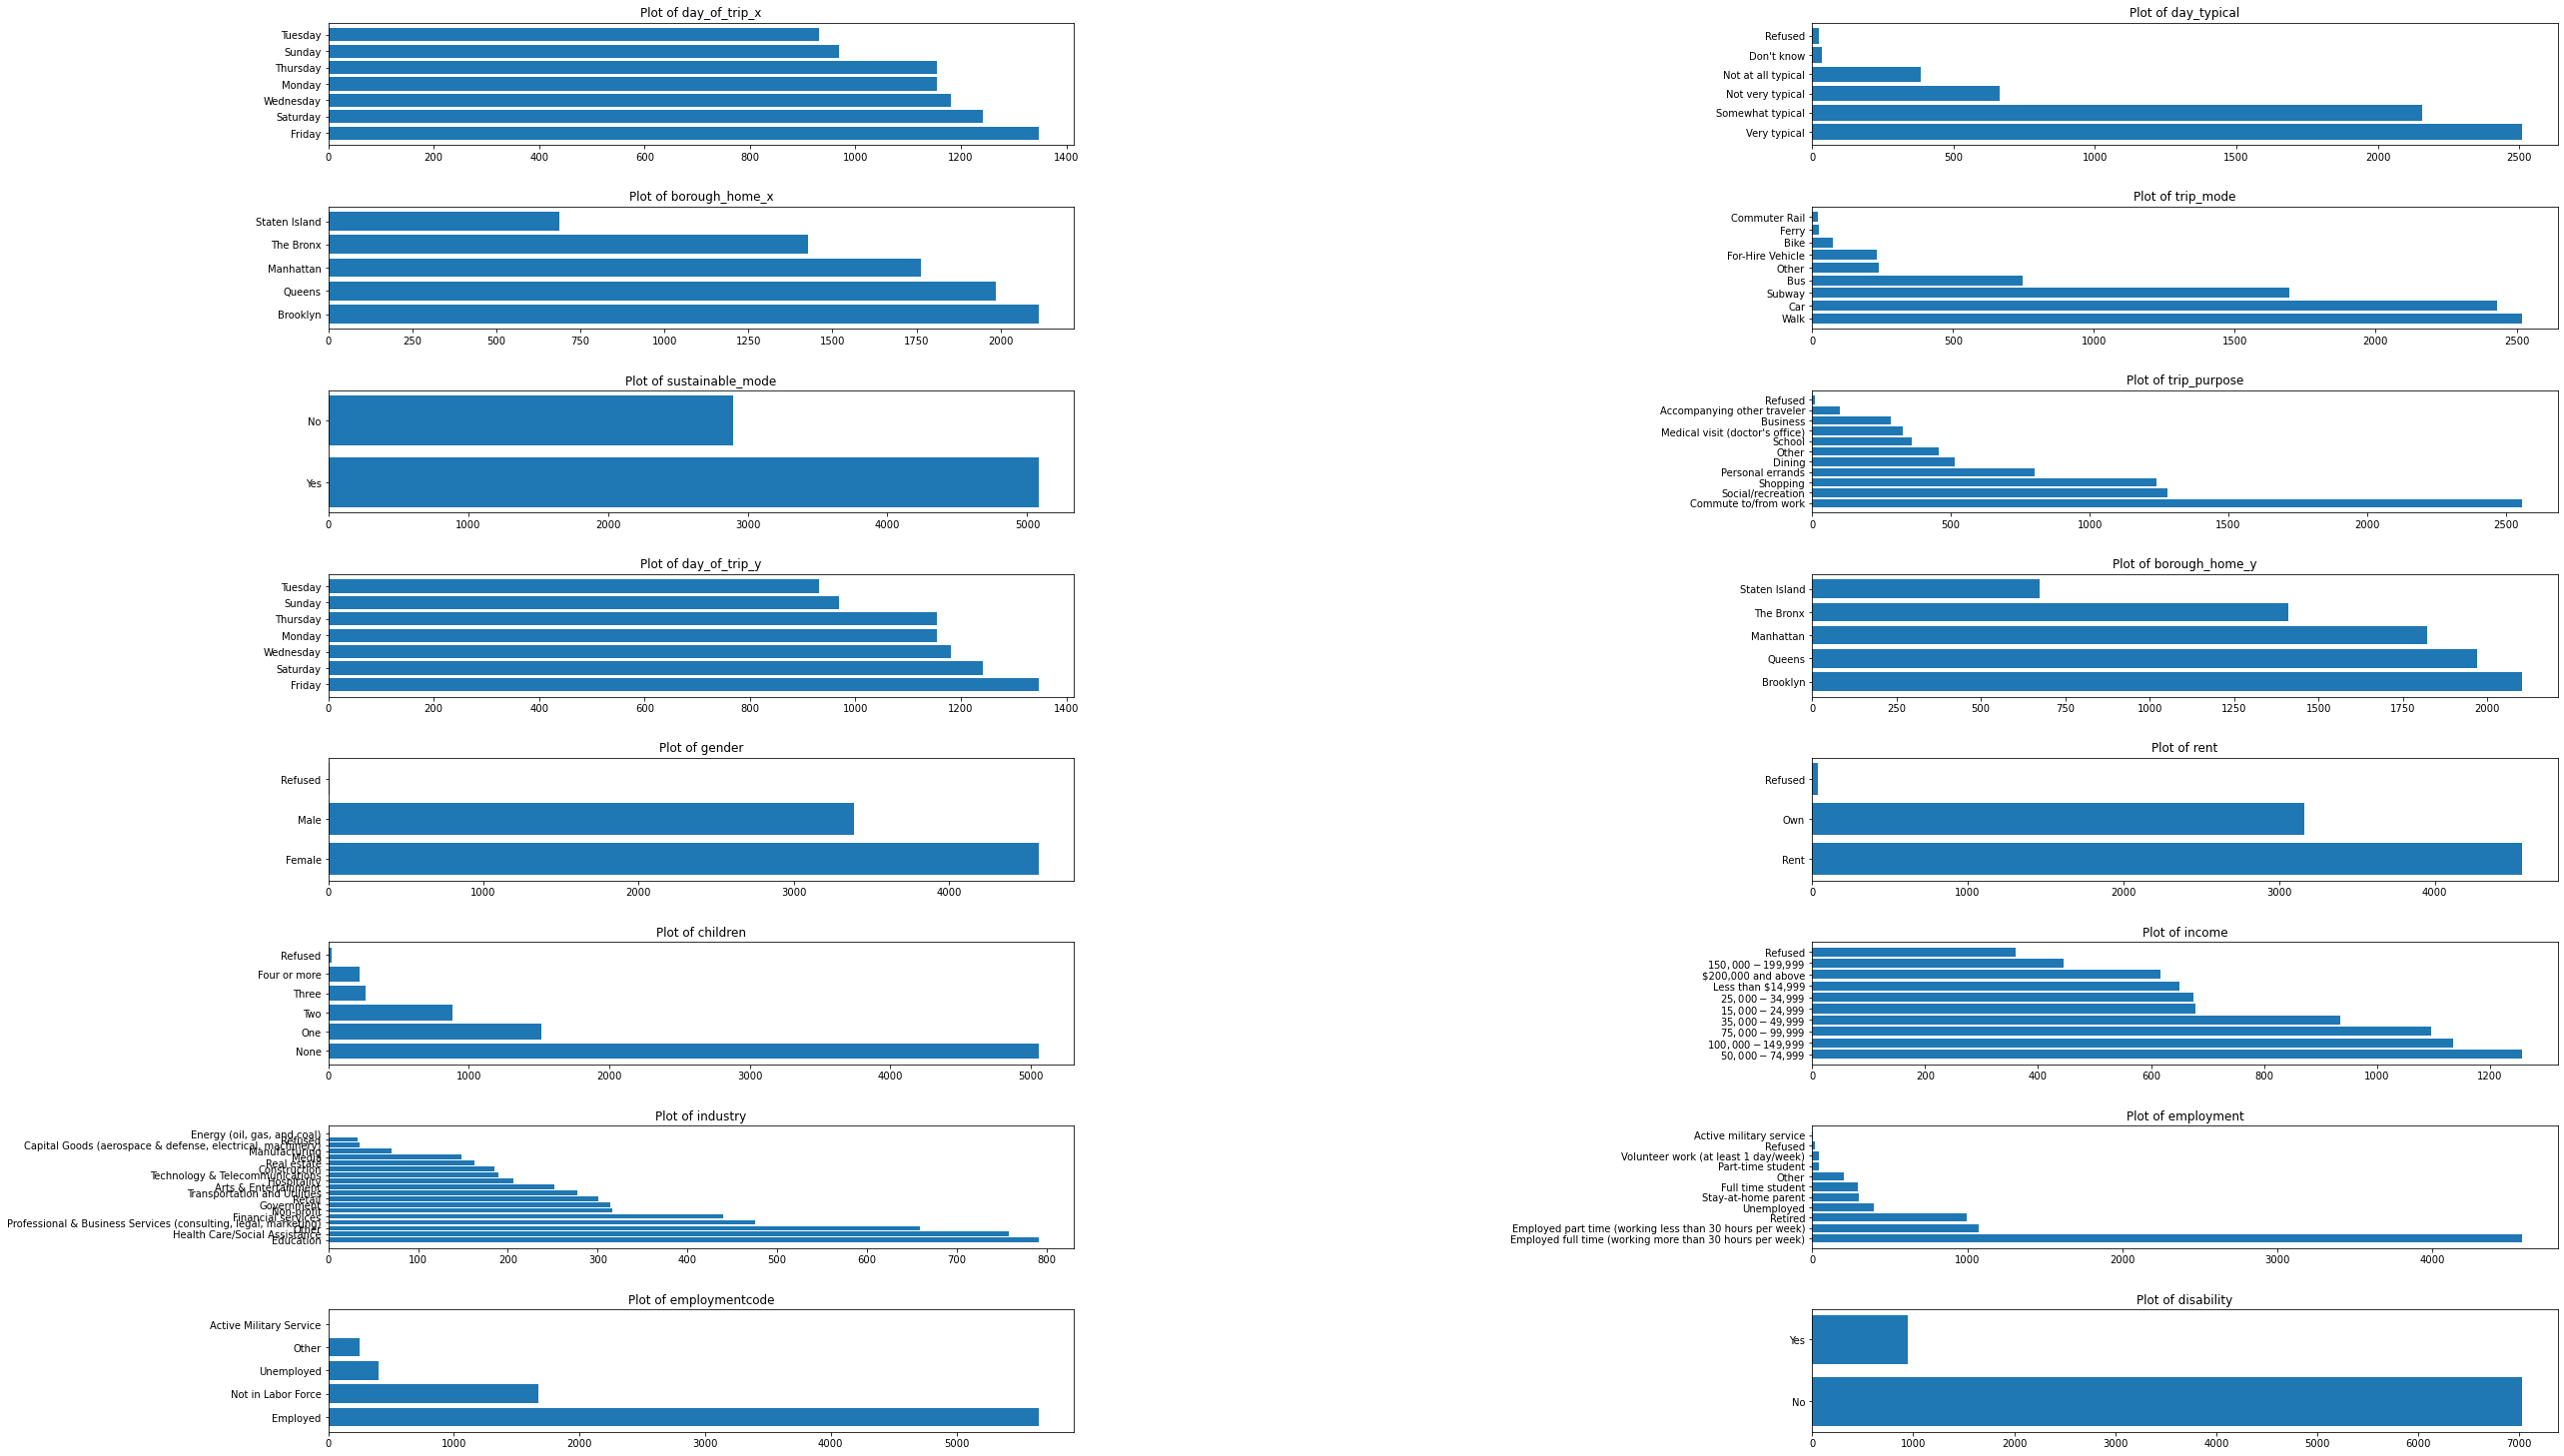

In [40]:
#visualizing categorical variables of the 2018 main data
cat_visual(df2018_comb)

<b> Checking 2017 data </b> We will verify the structure and summary statistics of each numerical and categorical column. 

In [41]:
#visualizing variables of the 2017 main dataa
display(df2017_comb.info() , df2017_comb.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6983 entries, 0 to 6982
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resp_id           6983 non-null   float64
 1   day_of_trip_x     6983 non-null   object 
 2   day_typical       6983 non-null   object 
 3   borough_home_x    6983 non-null   object 
 4   trip_length       6983 non-null   int64  
 5   num_of_trips      6801 non-null   float64
 6   trip_mode         6983 non-null   object 
 7   sustainable_mode  6983 non-null   object 
 8   trip_purpose      6983 non-null   object 
 9   trip_mode_rank    6983 non-null   int64  
 10  day_of_trip_y     3252 non-null   object 
 11  borough_home_y    6983 non-null   object 
 12  gender            6983 non-null   object 
 13  age               6983 non-null   float64
 14  rent              6904 non-null   object 
 15  children          6983 non-null   object 
 16  income            6983 non-null   object 


None

,resp_id,day_of_trip_x,day_typical,borough_home_x,trip_length,num_of_trips,trip_mode,sustainable_mode,trip_purpose,trip_mode_rank,day_of_trip_y,borough_home_y,gender,age,rent,children,income,industry,employment,employmentcode,disability
count,6983.00000,6983,6983,6983,6983.00000,6801.00000,6983,6983,6983,6983.00000,3252,6983,6983,6983.00000,6904,6983,6983,5092,6983,6983,6983
unique,NaN,7,6,5,NaN,NaN,9,2,12,NaN,7,5,3,NaN,4,7,11,20,12,7,2
top,NaN,Tuesday,Very typical,Queens,NaN,NaN,Car,Yes,Return home,NaN,Saturday,Queens,Female,NaN,Rent,None,"$50,000 - $74,999",Education,Employed full time (working more than 30 hours...,Employed full time (working more than 30 hours...,No
freq,NaN,1499,2925,2067,NaN,NaN,2212,4484,2213,NaN,673,2067,4318,NaN,4070,4764,1286,779,4213,4213,6433
mean,12883042.73350,NaN,NaN,NaN,30.98926,4.15851,NaN,NaN,NaN,2.61507,NaN,NaN,NaN,58.97236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,19351389.00855,NaN,NaN,NaN,36.06044,1.87480,NaN,NaN,NaN,1.25822,NaN,NaN,NaN,128.60270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,360.00000,NaN,NaN,NaN,0.00000,2.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4112.50000,NaN,NaN,NaN,10.00000,3.00000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,30.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11399.00000,NaN,NaN,NaN,20.00000,4.00000,NaN,NaN,NaN,3.00000,NaN,NaN,NaN,40.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10002074.00000,NaN,NaN,NaN,45.00000,5.00000,NaN,NaN,NaN,4.00000,NaN,NaN,NaN,57.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


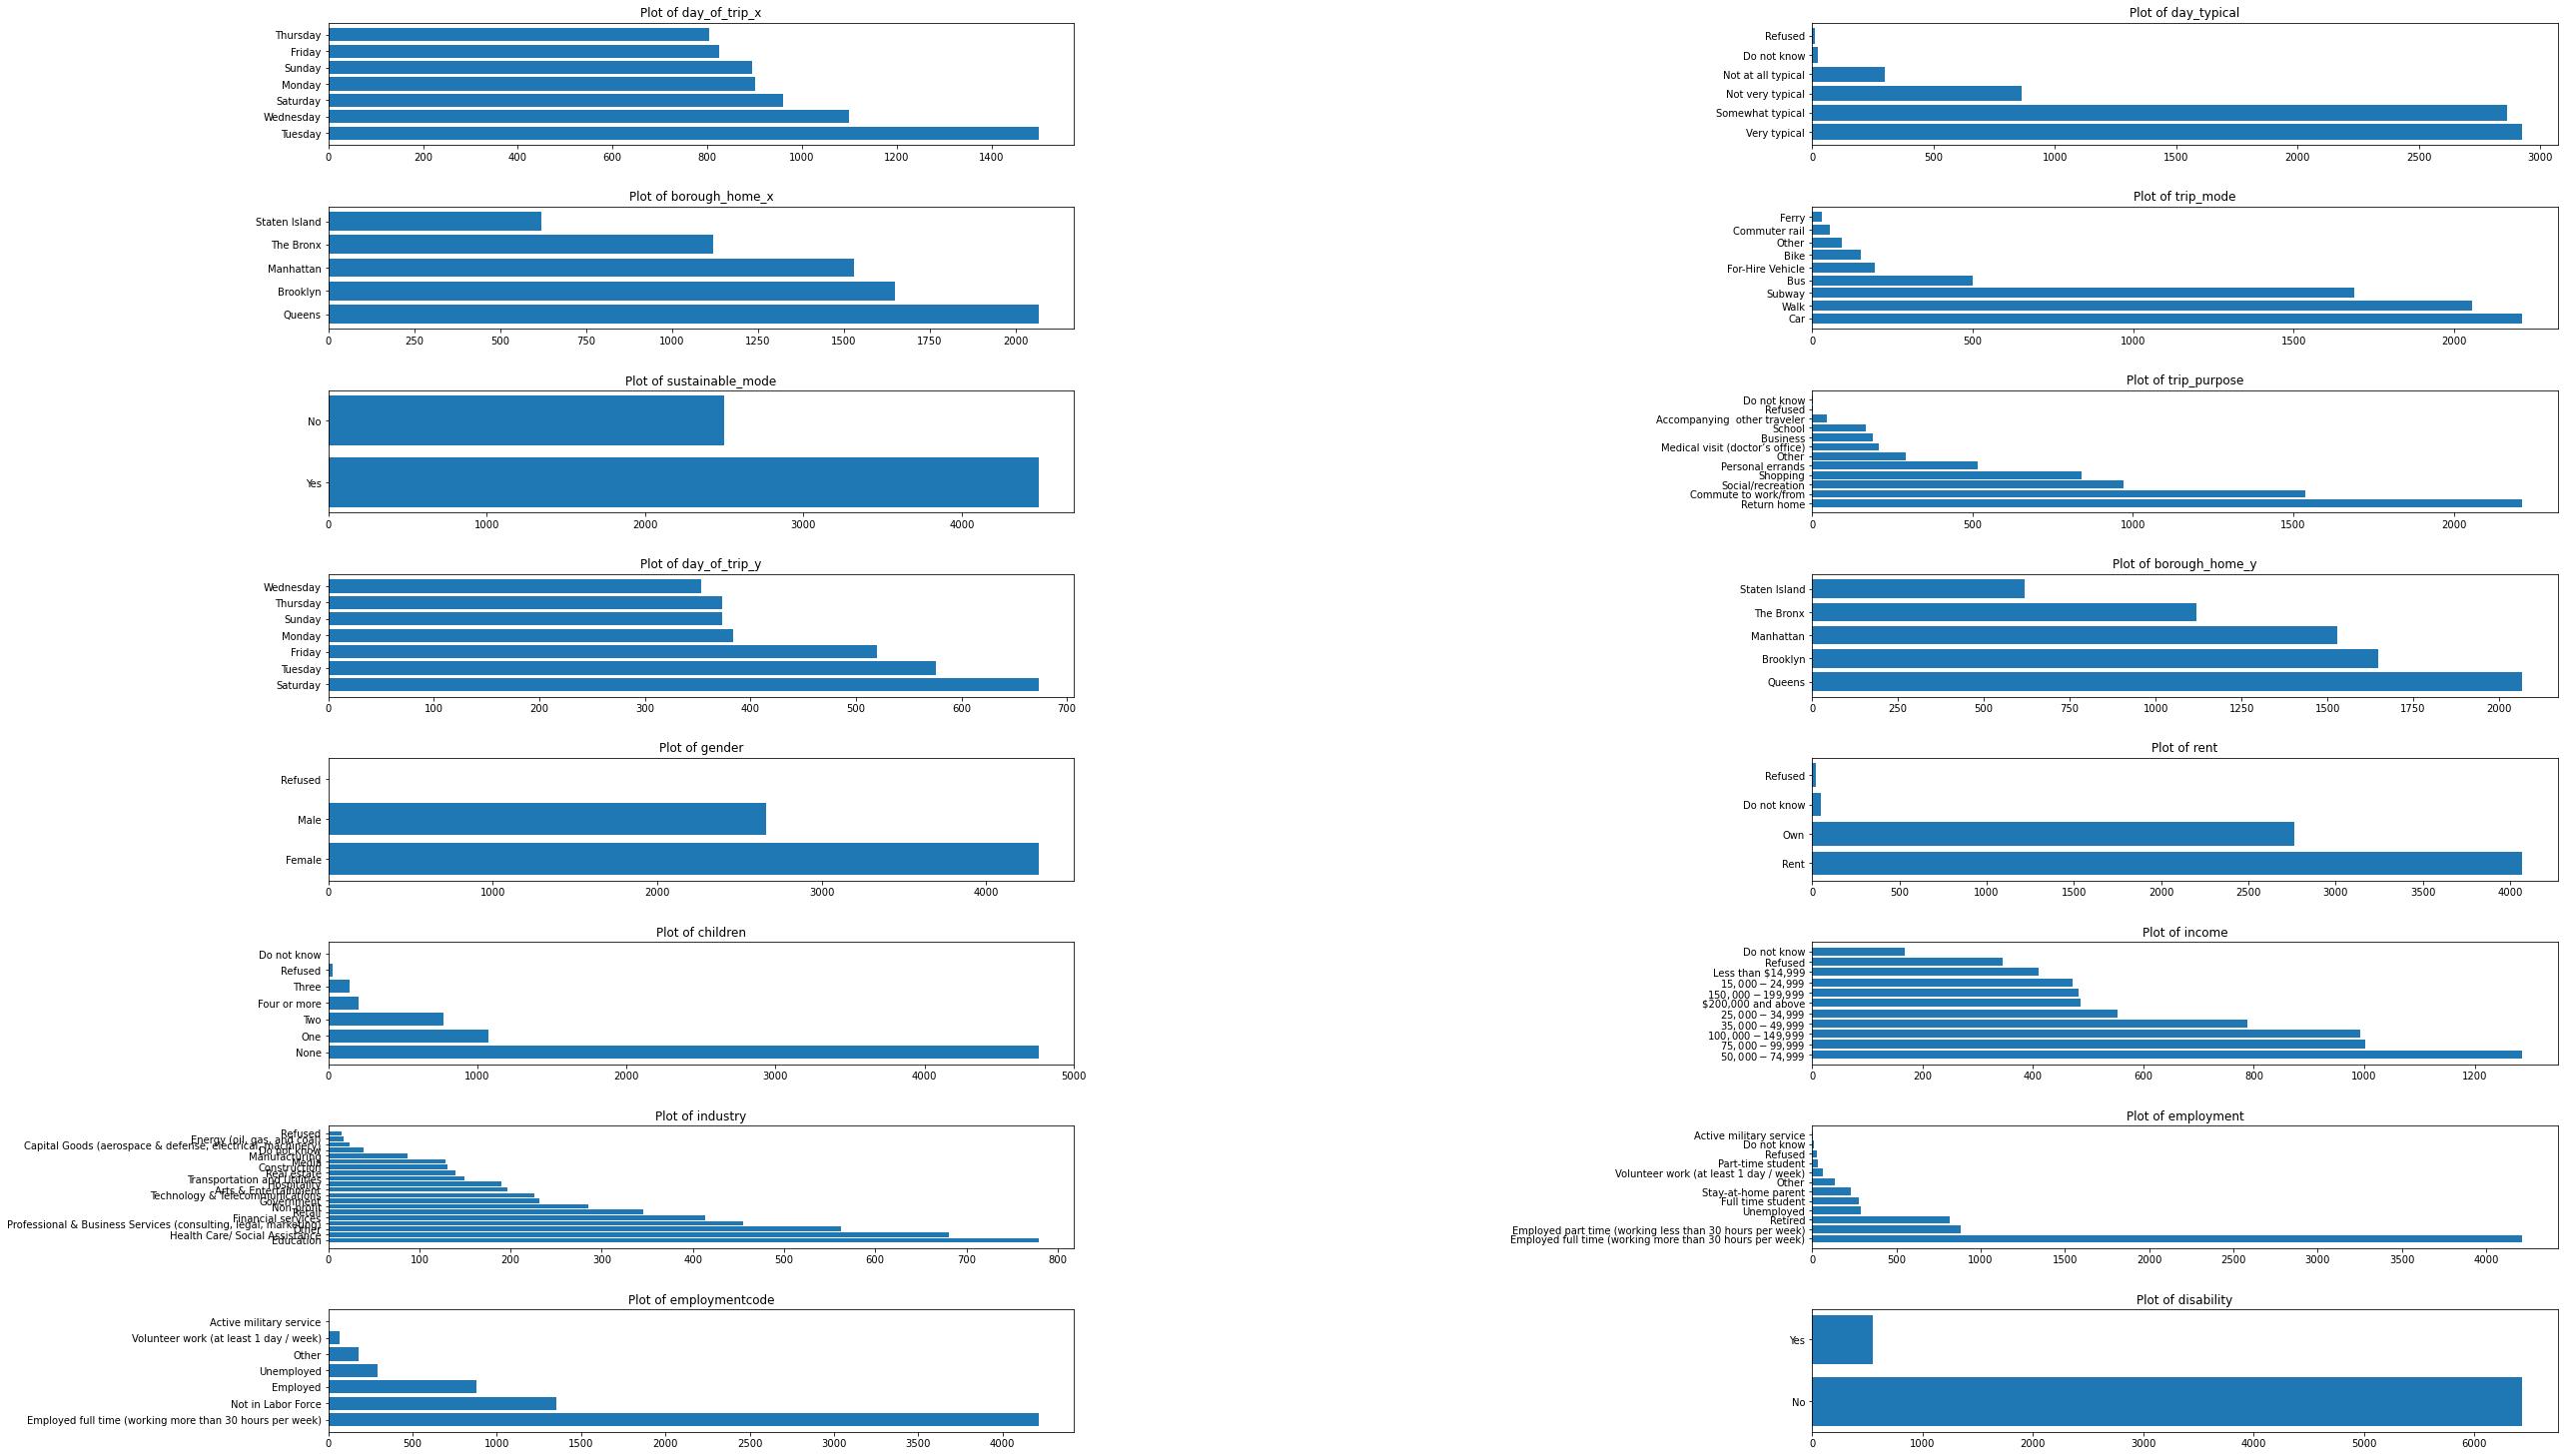

In [42]:
#visualizing categorical variables of the 2018 main data
cat_visual(df2017_comb)

<b> Aggregating the data to average transportation sustainability rank for each respondent </b> <a id="agg"></a>
- Rating 1: Highly Not Sustainable - Personal Car
- Rating 2: Not Sustainable - For-hire vehicle (car sharing, car pools, taxis, other car service) - 
- Rating 3: Sustainable - Public transportation (bus, subways, trains, ferry)
- Rating 4: Highly Sustainable (bike, walk)
- Other (do not know, refused)

In [43]:
#aggregating trip survey 
display(df2017_comb['trip_mode_rank'].value_counts() , df2018_comb['trip_mode_rank'].value_counts())

3    2275
1    2212
4    2209
2     194
0      93
Name: trip_mode_rank, dtype: int64

4    2595
3    2485
1    2431
0     236
2     230
Name: trip_mode_rank, dtype: int64

In [44]:
#as we cannot determine the sustainability of those respondents that didn't specify their mode of travel, we have to delete them 
pct_other = (df2018_comb[df2018_comb.trip_mode_rank==0]['resp_id'].count() / df2018_comb['resp_id'].count()) * 100
print('Percentage of Other modes:',round(pct_other,2))
df2018_trip = df2018_comb[df2018_comb.trip_mode_rank!=0]
display(df2018_trip['trip_mode_rank'].value_counts()) #verify there are no other mode 

Percentage of Other modes: 2.96


4    2595
3    2485
1    2431
2     230
Name: trip_mode_rank, dtype: int64

In [45]:
#as we cannot determine the sustainability of those respondents that didn't specify their mode of travel, we have to delete them 
pct_other = (df2017_comb[df2017_comb.trip_mode_rank==0]['resp_id'].count() / df2017_comb['resp_id'].count()) * 100
print('Percentage of Other modes:',round(pct_other,2))
df2017_trip = df2017_comb[df2017_comb.trip_mode_rank!=0]
display(df2017_trip['trip_mode_rank'].value_counts()) #verify there are no other mode 

Percentage of Other modes: 1.33


3    2275
1    2212
4    2209
2     194
Name: trip_mode_rank, dtype: int64

In [46]:
grp = df2017_comb.groupby(['resp_id','day_of_trip_x','day_typical','borough_home_x','num_of_trips'
                           ,'disability', 'gender', 'age', 'rent', 'children', 'income', 'industry','employmentcode']
                          ,dropna=False)
final_2018 = grp.agg({'trip_mode_rank':'mean','trip_length':'sum'}).reset_index()
final_2018.loc[:,'survey_year'] = '2018'
final_2018.head()

,resp_id,day_of_trip_x,day_typical,borough_home_x,num_of_trips,disability,gender,age,rent,children,income,industry,employmentcode,trip_mode_rank,trip_length,survey_year
0,360.00000,Friday,Somewhat typical,Queens,4.00000,No,Female,35.00000,Own,Two,"$150,000-$199,999",NaN,Not in Labor Force,1.00000,33,2018
1,366.00000,Saturday,Somewhat typical,Brooklyn,3.00000,No,Male,22.00000,Rent,None,"$35,000 - $49,999",Non-profit,Employed full time (working more than 30 hours...,2.50000,60,2018
2,371.00000,Saturday,Very typical,Brooklyn,3.00000,No,Female,25.00000,Rent,One,"$15,000 - $24,999",Retail,Employed,3.00000,120,2018
3,372.00000,Saturday,Very typical,Manhattan,3.00000,No,Male,40.00000,Rent,Two,"$150,000-$199,999",Real estate,Employed full time (working more than 30 hours...,4.00000,24,2018
4,374.00000,Saturday,Somewhat typical,The Bronx,3.00000,No,Male,52.00000,Rent,One,"$25,000 - $34,999",NaN,Other,4.00000,55,2018


In [67]:
grp = df2017_trip.groupby(['resp_id','day_of_trip_x','day_typical','borough_home_x','num_of_trips'
                           ,'disability', 'gender', 'age', 'rent', 'children', 'income', 'industry','employmentcode']
                          ,dropna=False)
final_2017 = grp.agg({'trip_mode_rank':'mean','trip_length':'mean'}).reset_index()
final_2017.loc[:,'survey_year'] = '2017'
final_2017.head()

,resp_id,day_of_trip_x,day_typical,borough_home_x,num_of_trips,disability,gender,age,rent,children,income,industry,employmentcode,trip_mode_rank,trip_length,survey_year
0,360.00000,Friday,Somewhat typical,Queens,4.00000,No,Female,35.00000,Own,Two,"$150,000-$199,999",NaN,Not in Labor Force,1.00000,11.00000,2017
1,366.00000,Saturday,Somewhat typical,Brooklyn,3.00000,No,Male,22.00000,Rent,None,"$35,000 - $49,999",Non-profit,Employed full time (working more than 30 hours...,2.50000,30.00000,2017
2,371.00000,Saturday,Very typical,Brooklyn,3.00000,No,Female,25.00000,Rent,One,"$15,000 - $24,999",Retail,Employed,3.00000,60.00000,2017
3,372.00000,Saturday,Very typical,Manhattan,3.00000,No,Male,40.00000,Rent,Two,"$150,000-$199,999",Real estate,Employed full time (working more than 30 hours...,4.00000,12.00000,2017
4,374.00000,Saturday,Somewhat typical,The Bronx,3.00000,No,Male,52.00000,Rent,One,"$25,000 - $34,999",NaN,Other,4.00000,27.50000,2017


<b> Merging the two years data into one final dataset </b> <a id="merge"></a>

In [48]:
data_comb = pd.concat([final_2018, final_2017], ignore_index=True)
data_comb.head(5)

,resp_id,day_of_trip_x,day_typical,borough_home_x,num_of_trips,disability,gender,age,rent,children,income,industry,employmentcode,trip_mode_rank,trip_length,survey_year
0,360.00000,Friday,Somewhat typical,Queens,4.00000,No,Female,35.00000,Own,Two,"$150,000-$199,999",NaN,Not in Labor Force,1.00000,33,2018
1,366.00000,Saturday,Somewhat typical,Brooklyn,3.00000,No,Male,22.00000,Rent,None,"$35,000 - $49,999",Non-profit,Employed full time (working more than 30 hours...,2.50000,60,2018
2,371.00000,Saturday,Very typical,Brooklyn,3.00000,No,Female,25.00000,Rent,One,"$15,000 - $24,999",Retail,Employed,3.00000,120,2018
3,372.00000,Saturday,Very typical,Manhattan,3.00000,No,Male,40.00000,Rent,Two,"$150,000-$199,999",Real estate,Employed full time (working more than 30 hours...,4.00000,24,2018
4,374.00000,Saturday,Somewhat typical,The Bronx,3.00000,No,Male,52.00000,Rent,One,"$25,000 - $34,999",NaN,Other,4.00000,55,2018


<b> Checking outliers and nulls on final combined data </b> <a id="outliers"></a>

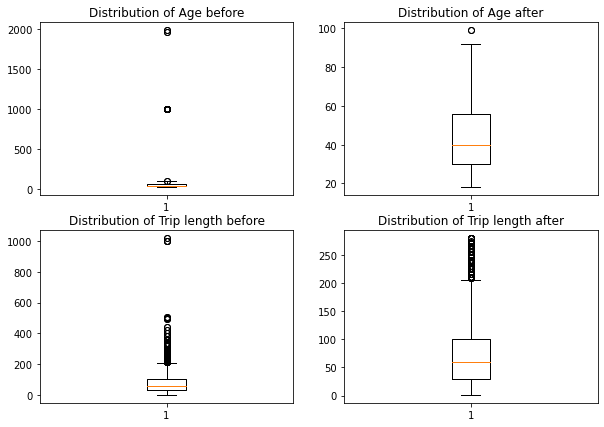

In [49]:
#cleaning numerical outliers
from scipy import stats

data_comb.loc[:,'z_score']=stats.zscore(data_comb.loc[:,'age'])
data_comb.loc[:,'z_score2']=stats.zscore(data_comb.loc[:,'trip_length'])
final_data=data_comb[ (data_comb['z_score']<3) & (data_comb['z_score']>-3) & (data_comb['z_score2']<3) & (data_comb['z_score2']>-3)]

plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
plt.title('Distribution of Age before')
plt.boxplot(data_comb['age'])
plt.subplot(2, 2, 2)
plt.title('Distribution of Age after')
plt.boxplot(final_data['age'])
plt.subplot(2, 2, 3)
plt.title('Distribution of Trip length before')
plt.boxplot(data_comb['trip_length'])
plt.subplot(2, 2, 4)
plt.title('Distribution of Trip length after')
plt.boxplot(final_data['trip_length'])
plt.show()

<AxesSubplot:>

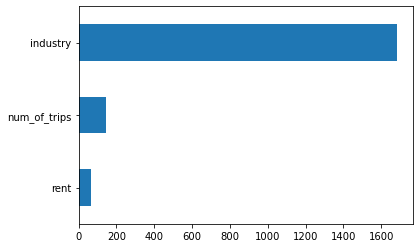

In [50]:
missing_counts = final_data.isnull().sum().sort_values()
missing_counts_plus = missing_counts[missing_counts >=1]
missing_counts_plus.plot(kind='barh')

# Data Visualization <a id="visual"></a>

## Mode Transportation Preferences <a id="preferences"></a>

In [51]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

#### No of Respondants per Gender

In [53]:
gen_2017 = df2017_comb["gender"].value_counts()
gen_2017_labels = (np.array(gen_2017.index))
gen_2017_sizes = (np.array((gen_2017 / gen_2017.sum())*100))


fig = px.pie(names=gen_2017_labels, values=gen_2017_sizes, title="2017")
fig.show()

In [54]:
gen_2018 = df2018_comb["gender"].value_counts()
gen_2018_labels = (np.array(gen_2018.index))
gen_2018_sizes = (np.array((gen_2018 / gen_2018.sum())*100))


fig = px.pie(names=gen_2018_labels, values=gen_2018_sizes, title="2018")
fig.show()

<b> For both years, around 60% of respondents were Female and around 40% were Male. There were negiligible count of respondents who refused to disclose their gender. </b>

#### Transportation Preference Per Borough

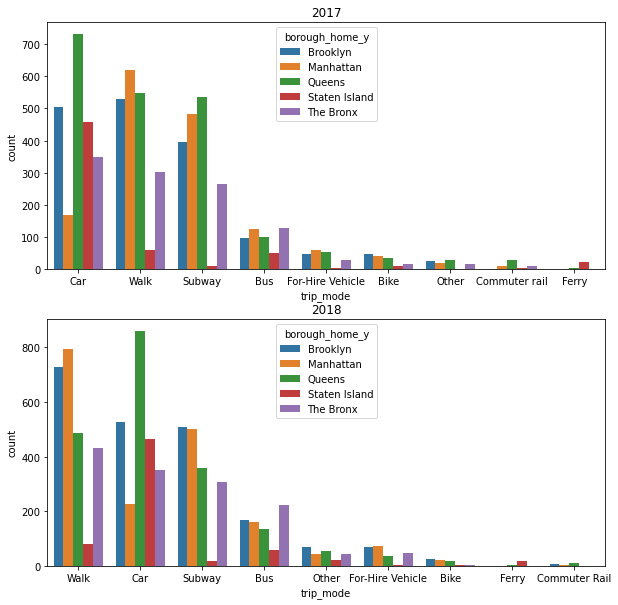

In [55]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
hue_order = ["Brooklyn", "Manhattan", "Queens", "Staten Island", "The Bronx"]
sns.countplot(hue = "borough_home_y",  x = "trip_mode", data = df2017_comb, order=df2017_comb.trip_mode.value_counts().index, hue_order= hue_order).set(title="2017")
ax2 = fig.add_subplot(2,1,2)
sns.countplot(hue = "borough_home_y",  x = "trip_mode", data = df2018_comb, order=df2018_comb.trip_mode.value_counts().index, hue_order= hue_order).set(title="2018")
plt.show()

<b>The residents preferred Car, Walk and Subway over any other mode of transportation. However, respondents from Manhattan and Brooklyn voted for walking ans Subway as their most preferred choice for transportation and residents of Queens preferred to travel in Car. </b>

#### Purpose for Transportation Per Borough

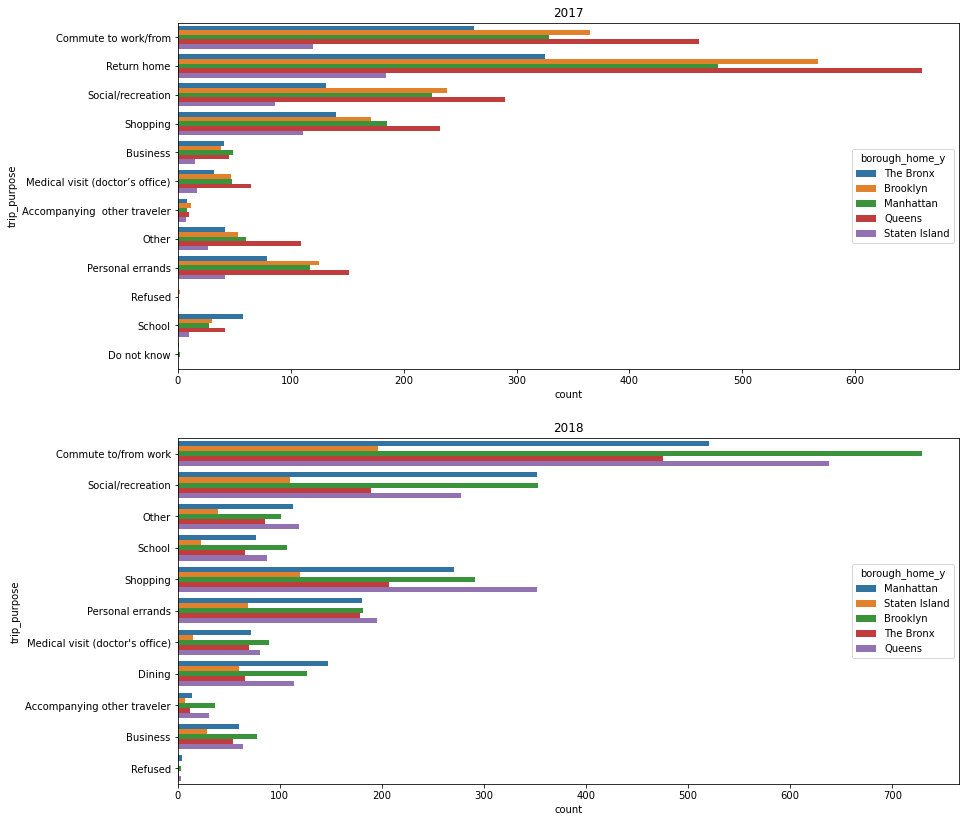

In [56]:
fig2 = plt.figure(figsize=(14,14))
ax12 = fig2.add_subplot(2,1,1)
sns.countplot(hue = "borough_home_y",  y="trip_purpose", data = df2017_comb).set(title="2017")
ax22 = fig2.add_subplot(2,1,2)
sns.countplot(hue = "borough_home_y",   y="trip_purpose", data = df2018_comb).set(title="2018")
plt.show()

<b> In 2017, it was observed that residents from Queens travelled the most whereas in 2018 residents who reported for taking trips were more when compared to other boroughs.

#### Tranportation Preference Per Employment Code

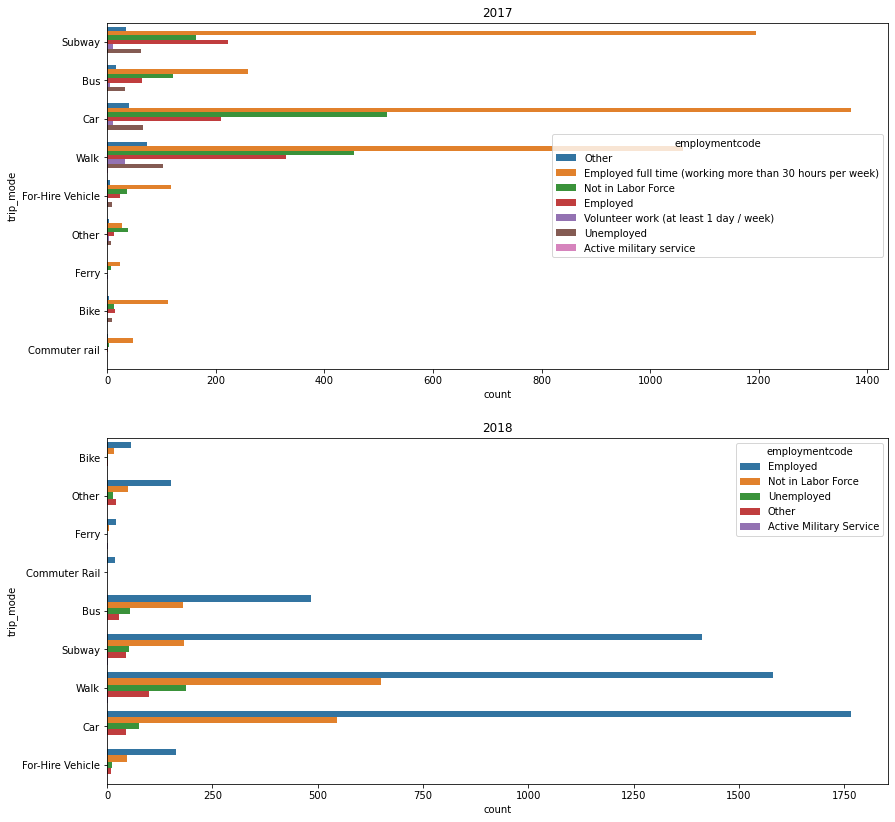

In [57]:
fig23 = plt.figure(figsize=(14,14))
ax123 = fig23.add_subplot(2,1,1)
sns.countplot(hue = "employmentcode",  y="trip_mode", data = df2017_comb).set(title="2017")
ax223 = fig23.add_subplot(2,1,2)
sns.countplot(hue = "employmentcode",  y="trip_mode", data = df2018_comb).set(title="2018")
plt.show()

<b>Those who are employed most preferred to use their own car followed by subway and then by walk in 2017. Whereas in 2018, they still tend to prefer to use their own car followed by walking and then subway.

#### Weekends vs Weekdays

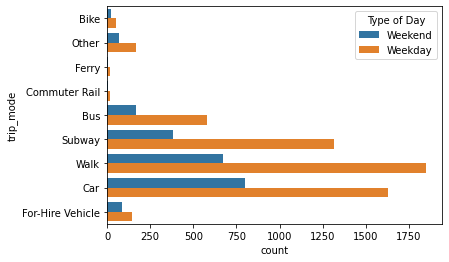

In [58]:
df2018_comb["Type of Day"] = df2018_comb["day_of_trip_x"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")
df2018_comb["Type of Day"].value_counts()
sns.countplot(hue = "Type of Day", y = "trip_mode", data = df2018_comb)
plt.show()

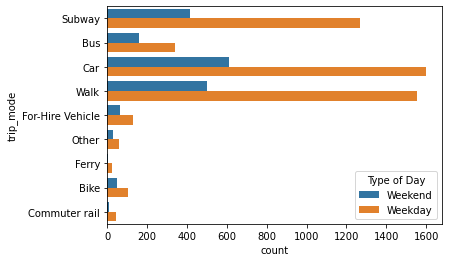

In [70]:
df2017_comb["Type of Day"] = df2017_comb["day_of_trip_x"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")
df2017_comb["Type of Day"].value_counts()
sns.countplot(hue = "Type of Day", y = "trip_mode", data = df2017_comb)
plt.show()

#### House owners vs Rent

In [61]:
cnt_mode_17 = df2017_comb.loc[df2017_comb["rent"]=="Rent","trip_mode"].value_counts()
trace = go.Bar(
    x=cnt_mode_17.index,
    y=cnt_mode_17.values,
    name = "Rent",
    marker = dict(color = '#85e6bf',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
)

cnt_mode_17 = df2017_comb.loc[df2017_comb["rent"]=="Own","trip_mode"].value_counts()
trace2 = go.Bar(
    x=cnt_mode_17.index,
    y=cnt_mode_17.values,
    name = "Own",
    marker = dict(color = '#85C7DE',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
)



layout = go.Layout(
    title="Rent Transport 2017"
)
data = [trace, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [62]:
cnt_mode_18 = df2018_comb.loc[df2018_comb["rent"]=="Rent","trip_mode"].value_counts()
trace = go.Bar(
    x=cnt_mode_18.index,
    y=cnt_mode_18.values,
    name = "Rent",
    marker = dict(color = '#85e6bf',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
)

cnt_mode_18 = df2018_comb.loc[df2018_comb["rent"]=="Own","trip_mode"].value_counts()
trace2 = go.Bar(
    x=cnt_mode_18.index,
    y=cnt_mode_18.values,
    name = "Own",
    marker = dict(color = '#85C7DE',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
)



layout = go.Layout(
    title="Rent Transport 2018"
)
data = [trace, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<b>For both the years it can be observed that those who rent tend to use public transit more than those who own their own houses. Walking is the most preferred mode of transport for those who rent whereas using car is the most prefered mode of transport for those who own house.


## Mode Transportation Sustainability <a id="sustainability"></a>

### Transportation Mode Sustainability per demographics

<Figure size 720x576 with 0 Axes>

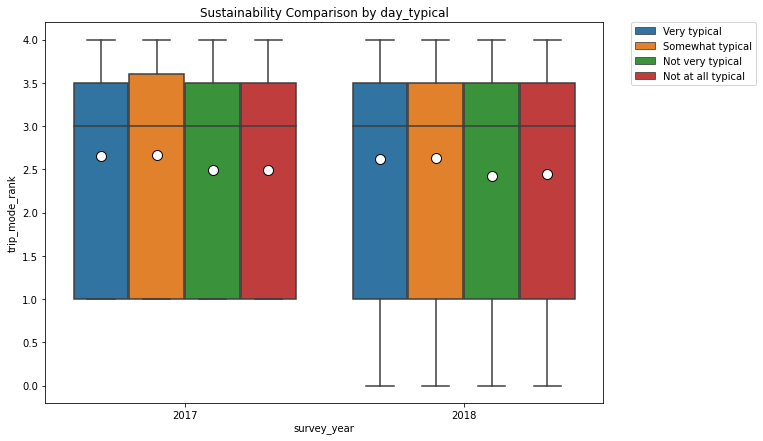

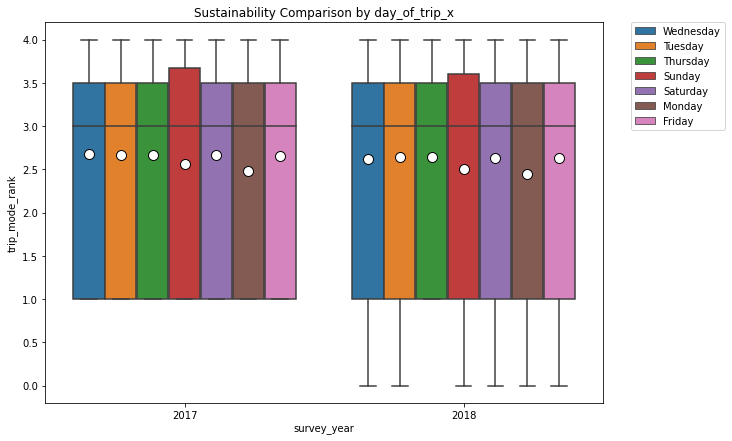

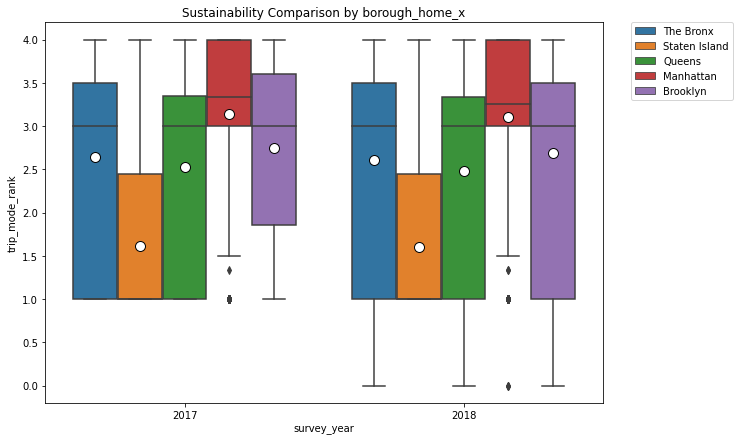

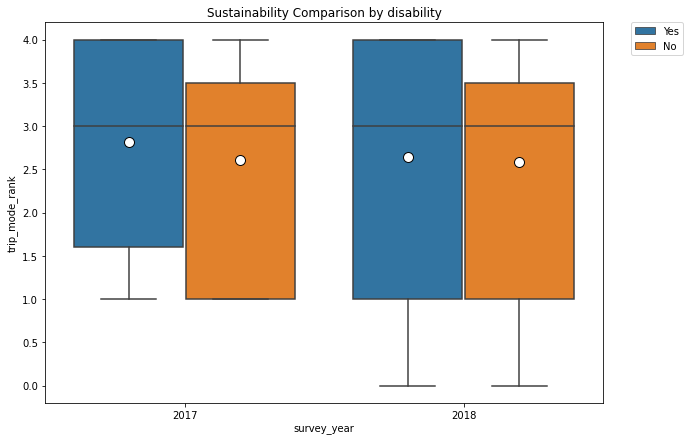

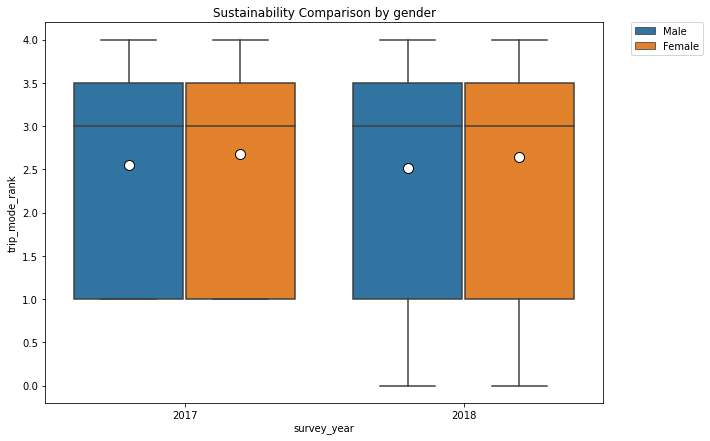

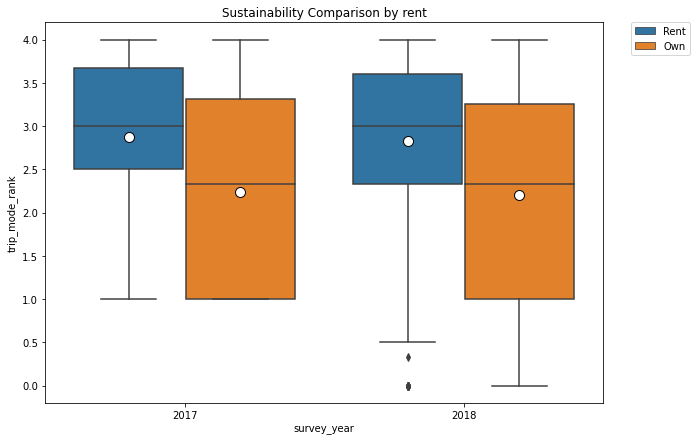

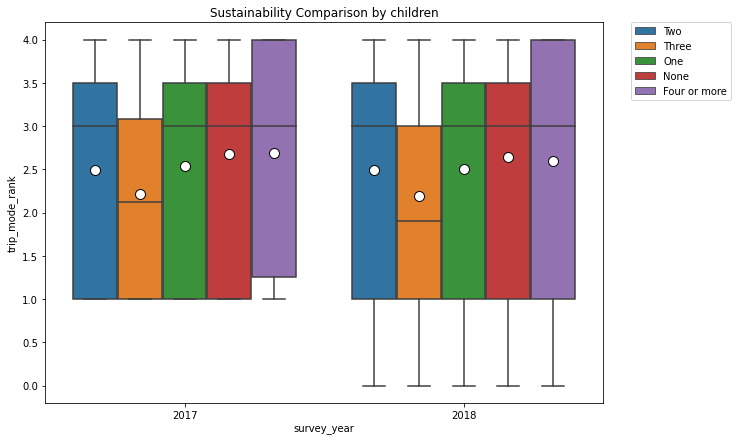

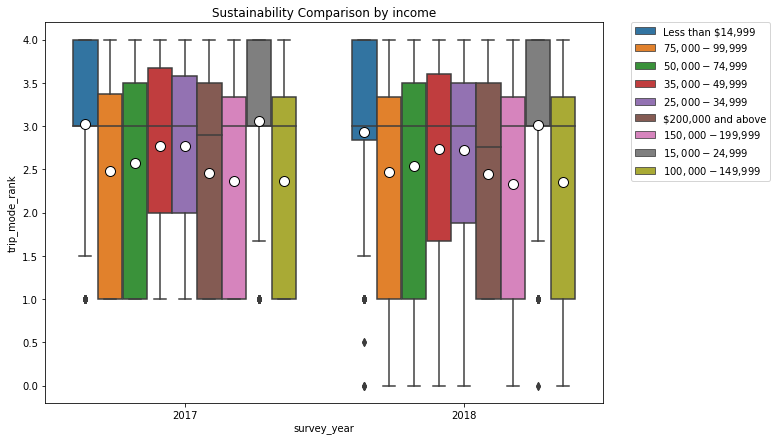

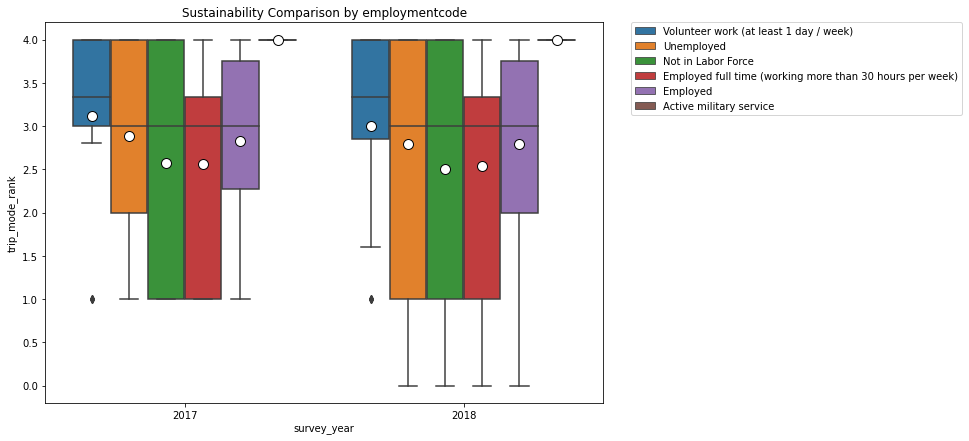

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
col_groups=['day_typical','day_of_trip_x','borough_home_x'
                           ,'disability', 'gender', 'rent', 'children', 'income','employmentcode']

for i in col_groups:
    plt.figure(figsize=(10,7))
    a_title = "Sustainability Comparison by " + i
    final_filter=final_data[ (final_data[i]!='Refused') & (final_data[i]!='Other') & (final_data[i]!='Do not know')]
    hue_sort = final_filter.groupby([i])[['trip_mode_rank']].mean().iloc[::-1].index
    sns.boxplot(y='trip_mode_rank',x='survey_year', data=final_filter
                ,  hue=i, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, order=["2017","2018"], hue_order=hue_sort).set(title=a_title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

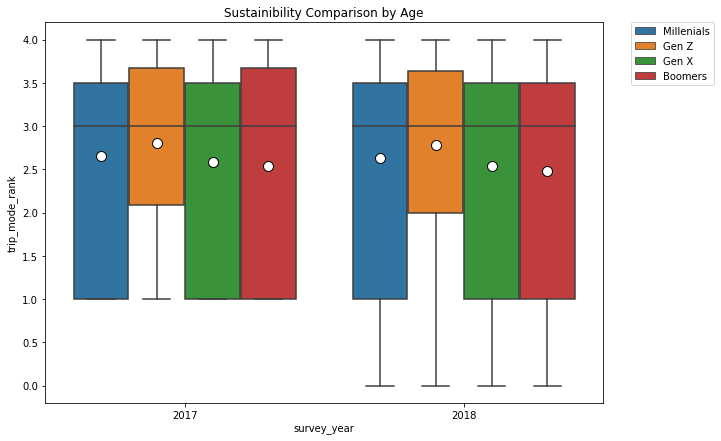

In [73]:
pd.options.mode.chained_assignment = None  # default='warn'

plt.figure(figsize=(10,7))
final_data.loc[:,'age_cat'] = np.where(final_data.age <=24, 'Gen Z'
                                 , np.where( (final_data.age>24) &  (final_data.age<=40), 'Millenials'
                                            , np.where( (final_data.age>40) &  (final_data.age<=56), 'Gen X'
                                            ,'Boomers'))
                                     )
sns.boxplot(y='trip_mode_rank',x='survey_year', hue='age_cat', data=final_data
                ,   showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, order=["2017","2018"]).set(title='Sustainibility Comparison by Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

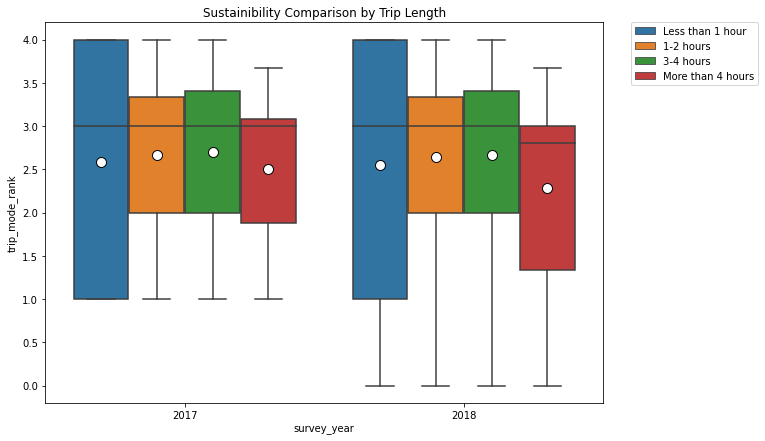

In [74]:
plt.figure(figsize=(10,7))
final_data.loc[:,'trip_length_cat'] = np.where(final_data.trip_length <=60, 'Less than 1 hour'
                                 , np.where( (final_data.trip_length>60) &  (final_data.trip_length<=120), '1-2 hours'
                                            , np.where( (final_data.trip_length>120) &  (final_data.trip_length<=240), '3-4 hours'
                                            ,'More than 4 hours'))
                                     )
sns.boxplot(y='trip_mode_rank',x='survey_year', hue='trip_length_cat', data=final_data
                ,   showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, order=["2017","2018"]).set(title='Sustainibility Comparison by Trip Length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<b> The above graphs decribes the choices of residents on sustainable mode of transportation with respect to the factors considered based on the ranks allotted for each mode of transportation based on the sustainability.</b>
    
<ul>
    <li> On non-typical days the sustainability score is observed to be lower as compared to the typical days.</li>
    <li> Mondays tend to have the lowest sustainability score in both the years, followed by SUnday. Tuesday and Saturdays tend to have higher sustainability scores. </li>
    <li> In both the years, Manhatten has the highest sustainability score, followed by Brooklyn, THe Bronx & Queens. Staten island has the lowest sustainability scores in both the years. </li>
    <li> People with disability tend to use more sustainable mode of transportation on avergage as compared to others. </li>
    <li> It can be observed that in both the years, female tend to use more sustainable transportation as compared to males. </li>
    <li> Those who rent are more sustainable w.r.t transportation than those who own houses in both the years. </li>
    <li> When looking at the number of children, those who have four or more children are more sustainable in both the years, followed but those who have no children at all. People with three children tend to have the lowest sustainability score. </li>
    <li> For both years, those in the lower income bracket used more sustainable modes of transport when compared to the ones in the highest income bracket. </li>
    <li> People doing volunteer work had a higher sustainability score in both the years. Those who were employeed full time & the ones not in labour force tended to have a lower sustainability score. </li>
    <li> Transportation sustainability can be associated with age in which younger people, specifically Millenials, used less sustainable modes of transportation compared to other generations </li>
    <li> Sustainability can be associated with the trip length, the longer the trip length the less sustainable modes of transportation used. </li>
    </ul>

### Overall Transportation Sustainability between the two years

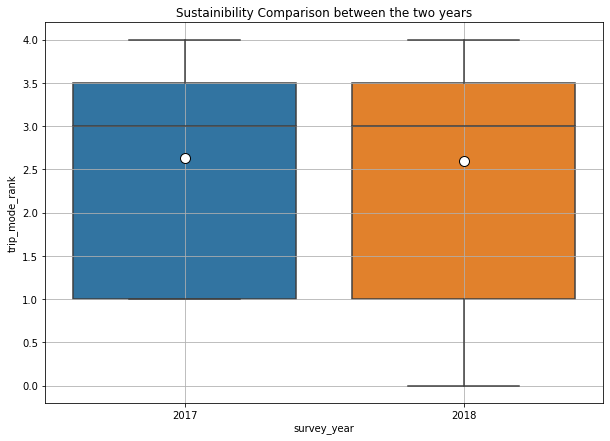

In [66]:
plt.figure(figsize=(10,7))
sns.boxplot(y='trip_mode_rank',x='survey_year', data=final_data
                ,   showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, order=["2017","2018"]).set(title='Sustainibility Comparison between the two years')
plt.grid(True)

# Conclusion <a id="conc"></a>

Through this analysis, we could see interesting and changing patterns affecting resident's choice of transportation for the years 2017 and 2018 in the city of New York. Majority of the respondents were Female. 

There was less preference for Ferry and Commute rail as a mode of transportation. Residents from Queens were reported to travel more via Car whereas residents from Brooklyn and Manhattan preferred to travel via Walk or Subway.
 
It was also observed that most of people who were travelling were employed and they mostly travelled for the purpose of going to office and return home.

Also, the residents who rented preferred to travel via public transit or by walking, whereas respondents who owned a house preferred to travel via car which implies that socioeconomic factors also affect choices on mode of transportation and the sustainability of the same.

Based on comparing impact of various factors for the sustainability on mode of transportation preferred by residents, it was observed that the overall sustainability factor for 2017 was higher when compared to 2018. This needs to be considered as  second avenue subway which is a new line for subway transportation was introduced with the intention to make transportation more sustainable in 2018. However, there were no improvements in sustainability factor for 2018.